In [1]:
# make the necessary imports 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
# import yfinance as yf
import warnings
import datetime
import pyfolio as pf
import backtrader as bt
from backtrader.feeds import PandasData
import warnings

# set the style and ignore warnings
plt.style.use('seaborn-colorblind')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

E:\Anaconda\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# this is to display images in notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 计算因子（不用执行）

## 计算因子并保存

In [ ]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')
from datetime import *
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
import os
import warnings
import scipy
from datetime import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings('ignore')

from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False


# In[44]:


#将下载的日度交易数据拼成一个#
def dailyrawfile_read(path):
    DailyRaw = pd.DataFrame()
    for i in range(1,6):
        f = path+str(i)+'.xlsx'
        file = pd.read_excel(f,header=0)
        file.drop([0,1],inplace=True)
        DailyRaw = DailyRaw.append(file, ignore_index=True)
    return DailyRaw

path1 = r'/Users/silvia95/Downloads/TRD_Dalyr/TRD_Dalyr'
DailyRaw = dailyrawfile_read(path1)
#读取子表，合并为大表并储存#
DailyRaw.to_csv("/Users/silvia95/Downloads/TRD_Dalyr/DailyRaw.csv", header=True,index = False) 


# In[ ]:


#读入大表,按股票代码、日期排序#
DailyRaw = pd.read_csv("/Users/silvia95/Downloads/TRD_Dalyr/DailyRaw.csv",header=0)
DailyRaw = DailyRaw.sort_values(by=['Stkcd','Trddt'])


# In[ ]:


dr1 = dr1.loc[dr1['Stkcd'].isin(SelectCode)]


# In[190]:


#去除掉2010年01月01日未上市的股票#
dr1 = DailyRaw
ipodate = pd.read_excel('/Users/silvia95/Downloads/TRD_Dalyr/TRD_Co.xlsx',header=0)
ipodate['ipo'] = pd.to_datetime(ipodate['Listdt']).dt.date
ipodate1 = ipodate.loc[ipodate['ipo']<pd.to_datetime('2010-01-01')]
select_code = list(ipodate1['Stkcd'].astype(str))
#select_code describe : 823#
dr1 = dr1.loc[dr1['Stkcd'].isin(select_code)]


# In[181]:


stockid = dr1['Stkcd']
stockid.drop_duplicates(inplace=True)
code_list = np.array(stockid)
code_list = code_list.tolist()
#共计823个股票#


# In[191]:


#仅保留2010年01月01日之后的交易信息#
dr1 = dr1.loc[pd.to_datetime(dr1['Trddt']).dt.date>=pd.to_datetime('2010-01-01')]


# In[311]:


#按照涨跌幅将数据分类，涨跌幅大于0，rise赋值为1，否则赋值为-1#
dr1.loc[dr1[dr1['ChangeRatio']>0].index.tolist(),'rise'] = 1
dr1.loc[dr1[dr1['ChangeRatio']<=0].index.tolist(),'rise'] = -1
#dr1 describe 2391060 rows × 16 columns#


# In[306]:


#计算换手率，日度个股换手率=日度个股交易金额/日度个股流通市值
dr1['Turnover'] = dr1['Dnvaltrd']/dr1['Dsmvosd']/1000


# In[262]:


#读取文件夹下所有文件的名字并把他们用列表存起来
path = "/Volumes/Expansion/ValuationMetrics"
datanames = os.listdir(path)
datanames = list(datanames)
ValuationMetrics = pd.read_excel("/Volumes/Expansion/ValuationMetrics/"+datanames[0]+"/STK_MKT_ValuationMetrics.xlsx",header=0)
path_len = int(len(datanames)/2)
for i in range(1,path_len):
    i = i*2
    path1 = path+"/"+datanames[i]
    ValuationMetrics1 = pd.read_excel(path1+"/STK_MKT_ValuationMetrics.xlsx",header=0)
    ValuationMetrics1.drop([0,1],inplace=True)
    ValuationMetrics = ValuationMetrics.append(ValuationMetrics1, ignore_index=True)

ValuationMetrics.drop([0,1],inplace=True)
ValuationMetrics = ValuationMetrics.sort_values(by=['Symbol','TradingDate'])
ValuationMetrics.drop_duplicates(inplace = True)
vm = ValuationMetrics
vm = vm.loc[pd.to_datetime(vm['TradingDate']).dt.date>=pd.to_datetime('2010-01-01')]
vm1 = vm.loc[vm['Symbol'].isin(code_list)]
vm1.rename(columns={"Symbol":"Stkcd","TradingDate":"Trddt"},inplace=True)


# In[270]:


#读取文件夹下所有文件的名字并把他们用列表存起来
path = "/Volumes/Expansion/StyleBox"
datanames = os.listdir(path)
datanames = list(datanames)
StyleBox = pd.read_excel("/Volumes/Expansion/StyleBox/"+datanames[0]+"/STK_MKT_StyleBox.xlsx",header=0)
path_len = int(len(datanames)/2)
for i in range(1,path_len):
    i = i*2
    path1 = path+"/"+datanames[i]
    StyleBox1 = pd.read_excel(path1+"/STK_MKT_StyleBox.xlsx",header=0)
    StyleBox1.drop([0,1],inplace=True)
    StyleBox = StyleBox.append(StyleBox1, ignore_index=True)
StyleBox.drop([0,1],inplace=True)
StyleBox = StyleBox.sort_values(by=['Symbol','TradingDate'])
StyleBox.drop_duplicates(inplace = True)
sb = StyleBox
sb = sb.loc[pd.to_datetime(sb['TradingDate']).dt.date>=pd.to_datetime('2010-01-01')]
sb1 = sb.loc[sb['Symbol'].isin(code_list)]
sb1.rename(columns={"Symbol":"Stkcd","TradingDate":"Trddt"},inplace=True)


# In[315]:


mergedata=pd.DataFrame()
dr2 = pd.concat([dr1.iloc[:,0:2],dr1.iloc[:,12:14],dr1.iloc[:,16],dr1.iloc[:,2:12],dr1.iloc[:,14:16]],axis=1)
mergedata = pd.merge(dr2,vm1,how = 'left',left_on = ('Stkcd','Trddt'),right_on = ('Stkcd','Trddt'))
mergedata = pd.merge(mergedata,sb1,how = 'left',left_on = ('Stkcd','Trddt'),right_on = ('Stkcd','Trddt'))
mergedata.to_csv("/Users/silvia95/Downloads/TRD_Dalyr/DailyRaw_v3.csv", header=True,index = False) 

In [ ]:
file = pd.read_csv('./DailyRaw_v3.csv')
file.head()

group = file.groupby('Stkcd')
stocks = file['Stkcd']
stocks.drop_duplicates(inplace=True)
stocks_list = np.array(stocks)
stocks_list = stocks_list.tolist()
len(stocks_list)

import talib as ta

# 趋势型因子：MA、EMA、MACD、MOM；能量型因子：RSI；量价因子：OBV

# MA、EMA
def ma(stock):
    N=[5,10,20,60,120]
    for i in N:
        stock['ma_'+str(i)] = ta.SMA(stock.Clsprc,timeperiod = i)
        stock['ema_'+str(i)] = ta.EMA(stock.Clsprc,timeperiod = i)
    return stock

# MACD
def macd(stock):
    macd, macdsignal, macdhist = ta.MACD(stock.Clsprc, fastperiod=12, slowperiod=26, signalperiod=9)
    stock['macd'] = macd
    return stock

# MOM = close(t)-close(t-n),n = 5,10,20,90,180
def mom(stock):
    N=[5,10,20,90,180]
    for i in N:
        stock['mom_'+str(i)] = ta.MOM(stock.Clsprc, timeperiod = i)
    return stock

# RSI12、RSI24
def rsi(stock):
    for i in [12,24]:
        stock['rsi_'+str(i)] = ta.RSI(stock.Clsprc, timeperiod = i)
    return stock

# OBV
def obv(stock):
    stock['obv'] = ta.OBV(stock.Clsprc, stock.Clsprc)
    return stock


df = pd.DataFrame()
for Stkcd in stocks_list:
    stock = group.get_group(Stkcd)
    ma(stock)
    macd(stock)
    mom(stock)
    rsi(stock)
    obv(stock)
    df = df.append(stock)
df = df.fillna(0)
df = df.loc[pd.to_datetime(df['Trddt']).dt.date>=pd.to_datetime('2011-01-01')]

#输出描述性统计
from pandas import set_option
description = df.describe()
description.round(3)
description.to_csv("./description.csv", header=True,index = True)


#将开收盘价、交易量等因子zscore处理为正态分布数据#
#1.避免离群值的干扰#
#2.统一量纲，避免规模较大因子有过大影响#
stockid = df['Stkcd']
stockid.drop_duplicates(inplace=True)
code_list = np.array(stockid)
code_list = code_list.tolist()
dr2 = pd.DataFrame()
for code in code_list:
    data1 = df.loc[df['Stkcd']==code] 
    data2 = pd.concat([data1.iloc[:,5:]],axis=1) 
    # zscore标准化
    zscore = preprocessing.StandardScaler()
    zscore = zscore.fit_transform(data2)
    df_zscore = pd.DataFrame(zscore,index=data2.index,columns=data2.columns)
    data3 = pd.concat([data1.iloc[:,0:5]],axis=1) 
    data4 = pd.concat([data3,df_zscore],axis=1)
    dr2 = pd.concat([dr2,data4],axis=0)

dr2 = dr2.fillna(0)
dr3 = dr2.loc[pd.to_datetime(dr2['Trddt']).dt.date>=pd.to_datetime('2011-01-01')]
#将选股、限定交易日期、归一化处理后的数据写入文件#
dr3.to_csv("./DailyRaw_before z-score.csv", header=True,index = False)

## 读取最终数据

In [3]:
f = './DailyRaw_before z-score.csv'
file = pd.read_csv(f, sep=',')#index_col=0
print(file.info(verbose=True, null_counts=True))
file=file.fillna(0)
# 根据stockid股票代码分类
group = file.groupby('Stkcd')
# 读取file中的股票列表
stocks = file['Stkcd']
stocks.drop_duplicates(inplace=True)
stocks_list = np.array(stocks)
stocks_list = stocks_list.tolist()
# 对每个股票逐一进行未来100天股价走势预测
future_days = 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391060 entries, 0 to 2391059
Data columns (total 49 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Stkcd               2391060 non-null  int64  
 1   Trddt               2391060 non-null  object 
 2   Markettype          2391060 non-null  float64
 3   Trdsta              2391060 non-null  float64
 4   rise                2391060 non-null  float64
 5   Opnprc              2391060 non-null  float64
 6   Hiprc               2391060 non-null  float64
 7   Loprc               2391060 non-null  float64
 8   Clsprc              2391060 non-null  float64
 9   Dnshrtrd            2391060 non-null  float64
 10  Dnvaltrd            2391060 non-null  float64
 11  Dsmvosd             2391060 non-null  float64
 12  Dsmvtll             2391060 non-null  float64
 13  Dretwd              2391060 non-null  float64
 14  Adjprcwd            2391060 non-null  float64
 15  ChangeRatio    

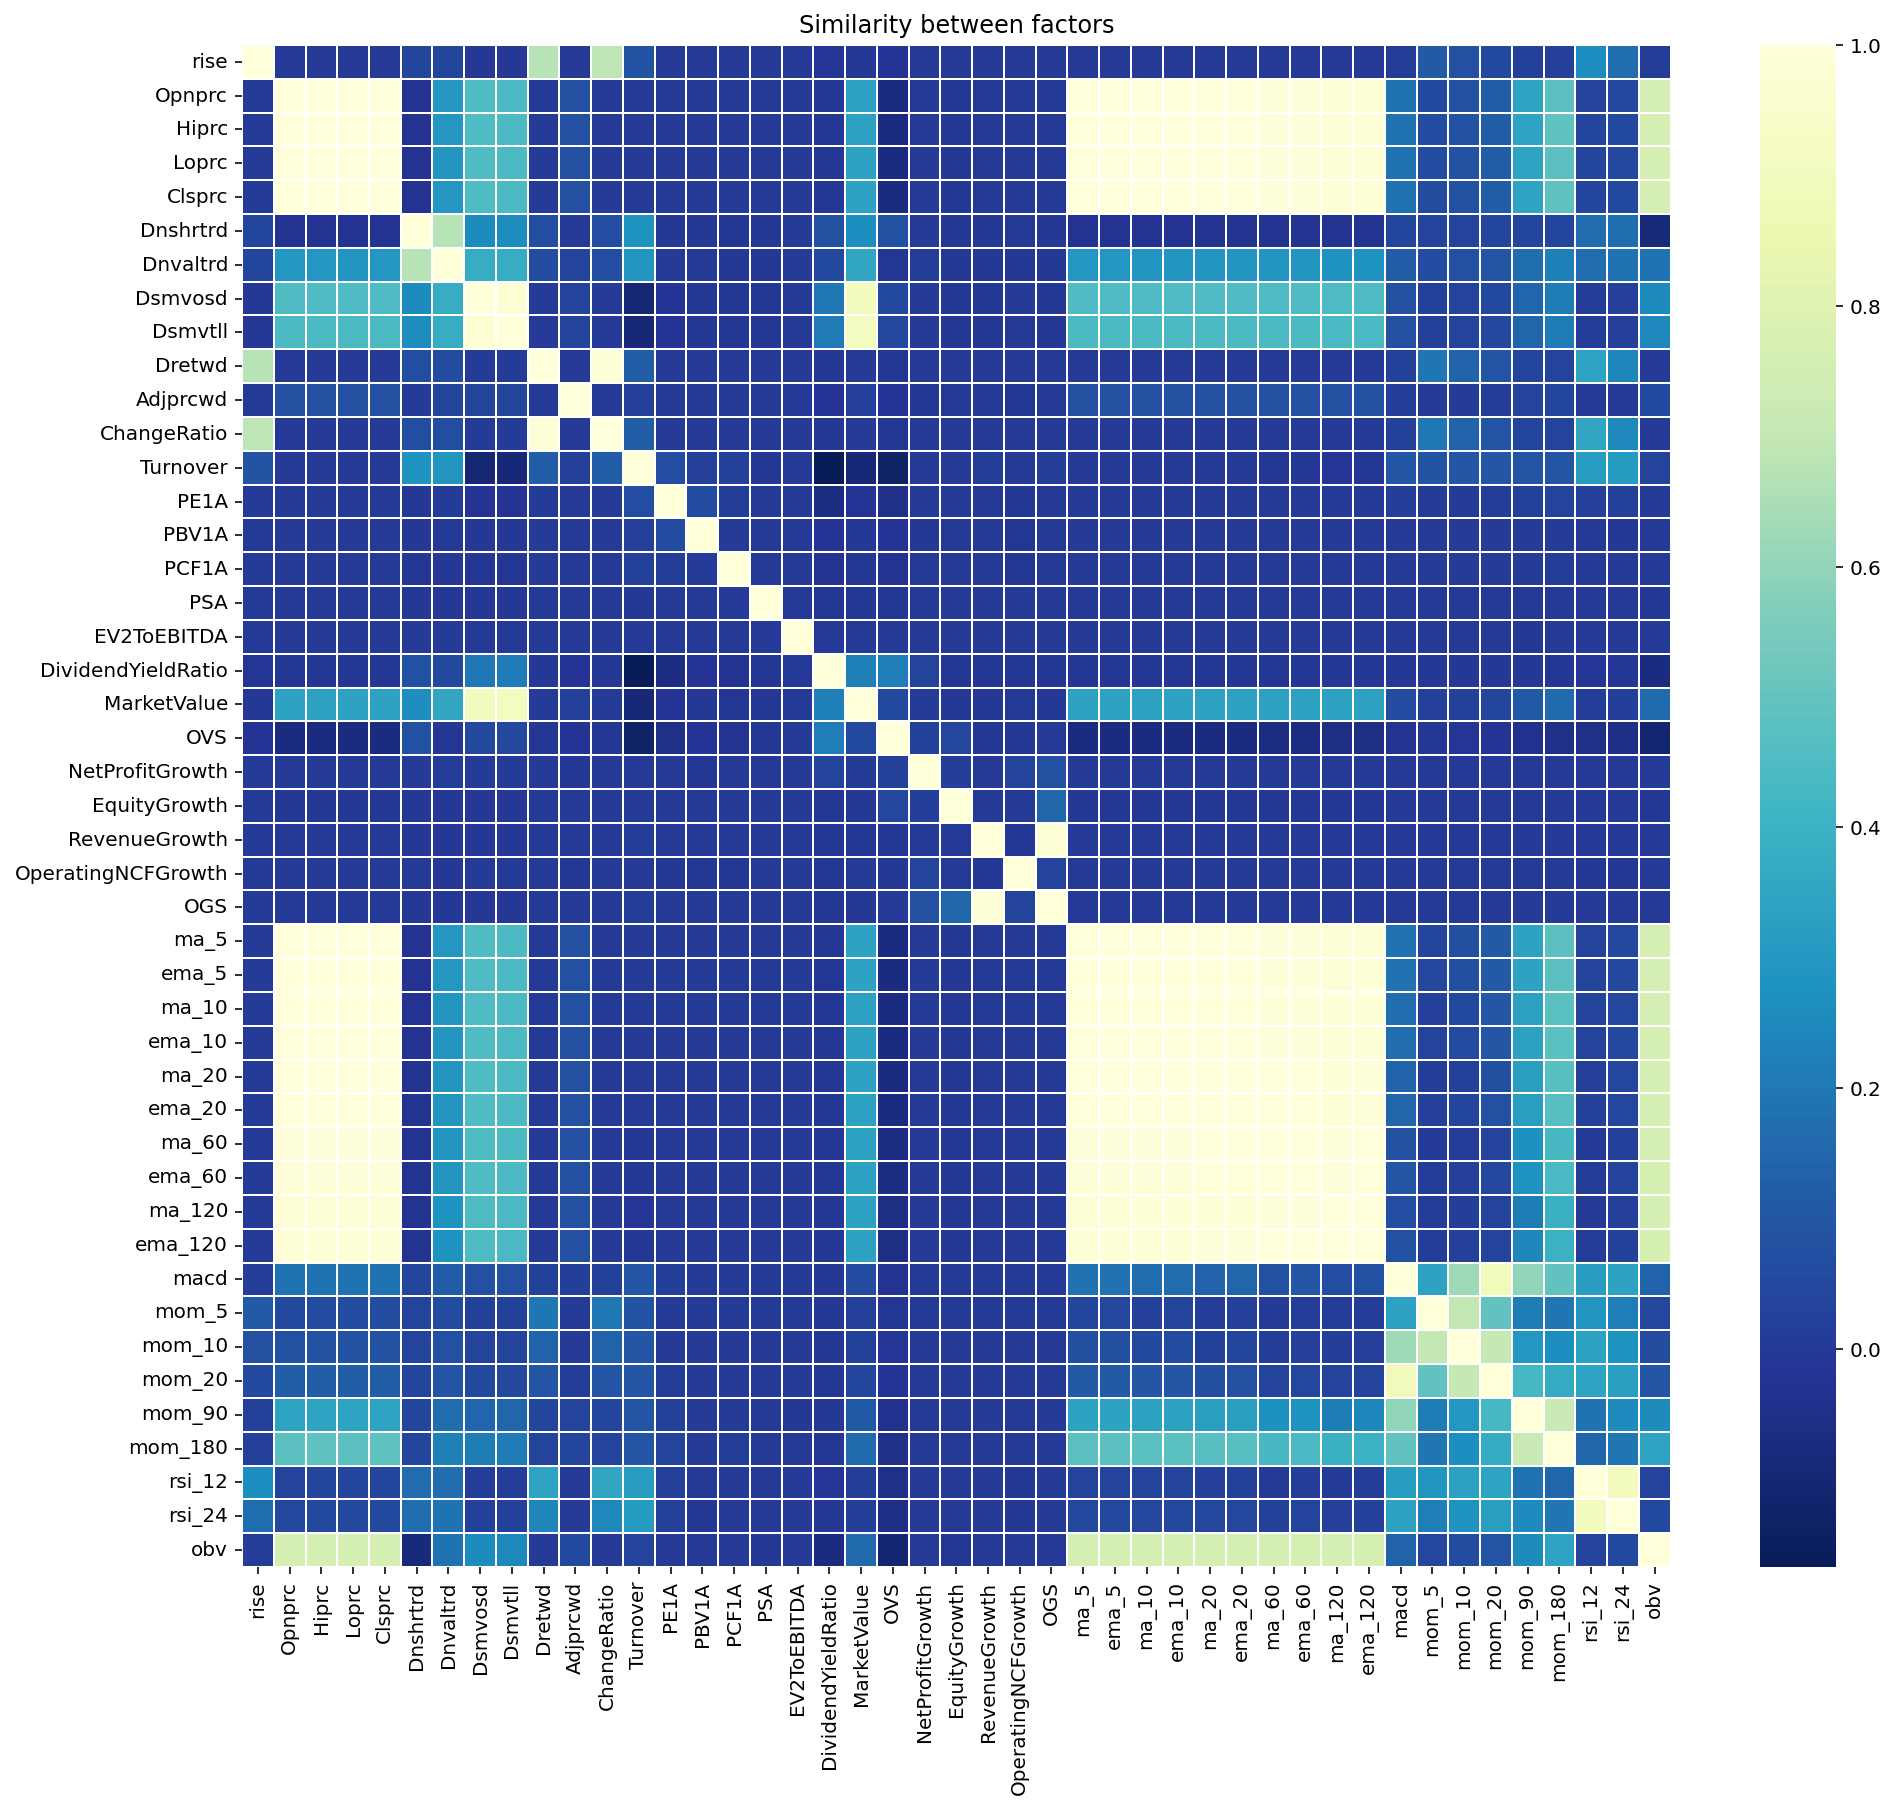

In [8]:
corr = file.drop(['Stkcd', 'Trddt','Trdsta','Markettype'], 1).corr().round(3)
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, annot=False, linewidths=.5, ax=ax, cmap="YlGnBu_r")
ax.set_title('Similarity between factors')
plt.show()
del file

# 计算基准收益率：上证300

In [77]:
SH300 = pd.read_csv('./hq_index_daily.csv', sep=',')#index_col=0
SH300['trade_date']=pd.to_datetime(SH300['trade_date'])
SH300.set_index('trade_date',inplace=True)
print(SH300.info(verbose=True, null_counts=True))
SH300=SH300.loc[SH300.index>='2016-01-04','close']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2677 entries, 2023-01-06 to 2012-01-04
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts_code    2677 non-null   object 
 1   close      2677 non-null   float64
 2   open       2677 non-null   float64
 3   high       2677 non-null   float64
 4   low        2677 non-null   float64
 5   pre_close  2677 non-null   float64
 6   change     2677 non-null   float64
 7   pct_chg    2677 non-null   float64
 8   vol        2677 non-null   float64
 9   amount     2677 non-null   float64
dtypes: float64(9), object(1)
memory usage: 230.1+ KB
None


In [78]:
benchmark=SH300.loc[SH300.index=='2016-01-04'].values[0]
benchmark_rets = np.log(SH300 / benchmark)
# benchmark_rets.short


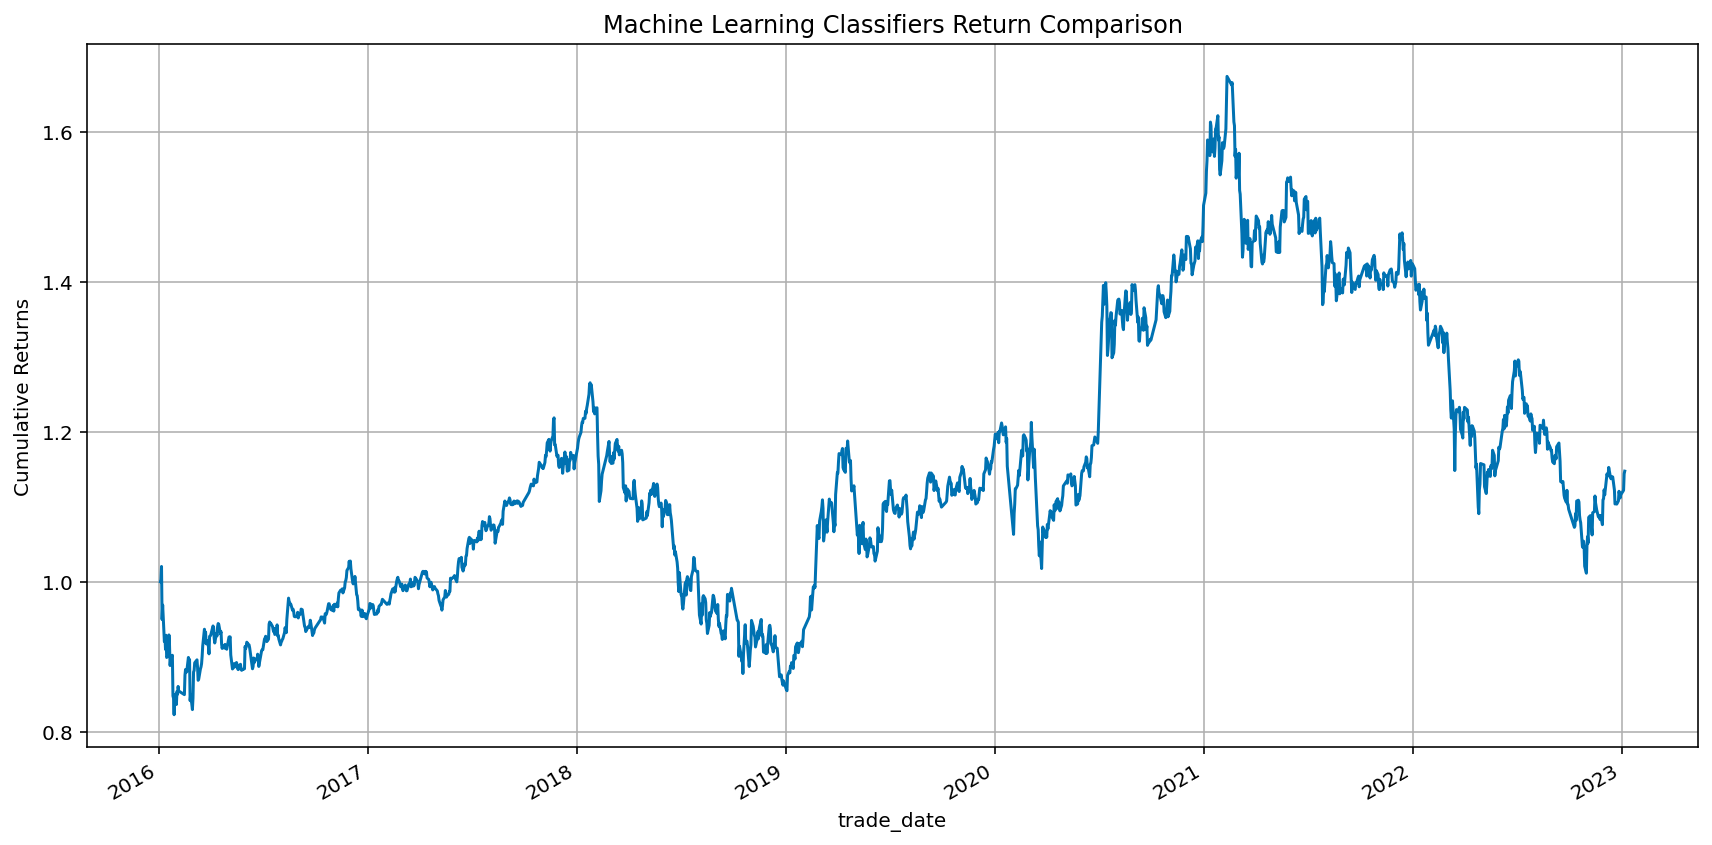

In [79]:
SH300=SH300 / benchmark
ax = SH300.plot(figsize=(12, 6),title = 'Machine Learning Classifiers Return Comparison')
ax.set_ylabel("Cumulative Returns")
ax.grid(True)
plt.tight_layout()
plt.show()
del SH300

# 准备训练数据

In [ ]:
# T    |  X   | P   | pred | 操作：当日下单，次日成交
# t    |  Xt  | Pt5 | Pt5_ | 预测5天后，对收益率=np.log(Pt5_/Pt)排序选股。第1组调仓：用1/5的资金t+1买入并持有到t+6再卖出
# t+1  |  Xt1 | Pt6 | Pt6_ | 预测5天后，对收益率=np.log(Pt6_/Pt)排序选股。第2组调仓：用1/5的资金t+2买入并持有到t+7再卖出
# t+2  |  Xt2 |     |      |                                            。第3组调仓：用1/5的资金t+3买入并持有到t+8再卖出
# t+3  |  Xt3 |     |      |                                            。第4组调仓：用1/5的资金t+4买入并持有到t+9再卖出
# t+4  |  Xt4 |     |      |                                            。第5组调仓：用1/5的资金t+5买入并持有到t+10再卖出
# t+5  |  Xt5 |     |      |                                            。第1组调仓：用1/5的资金t+6买入并持有到t+11再卖出

In [8]:
start_date = '2016-01-01'

stock_list=[]
stock_codes=[] #股票池
for i in range(len(stocks_list)):
    #筛选16年后满250个交易日的股票
    stockid = stocks_list[i]
    stock = group.get_group(stockid).copy()
    stock['Trddt']=pd.to_datetime(stock['Trddt'])
    stock.set_index('Trddt',inplace=True)
    mask = (stock.index >= start_date)
    if stock.loc[mask].shape[0] < 250:
        continue
#     stock['Clsprc_lag5']=stock['Clsprc'].shift(-5)
    stock['ret_5d']=stock['Dretwd'].rolling(5).mean().shift(-5)
    stock['returns'] = np.log(stock.Clsprc / stock.Clsprc.shift(1))
    stock.dropna(inplace=True)
    stock_list.append(stock)
    stock_codes.append(stockid)
# 处理后的数据
data_transformed=pd.concat(stock_list)
del stock_list
#用于预测的特征
features=list(stock.drop(['Stkcd','Trdsta','Markettype','rise','ret_5d'], 1).columns.values)
print(features)

['Opnprc', 'Hiprc', 'Loprc', 'Clsprc', 'Dnshrtrd', 'Dnvaltrd', 'Dsmvosd', 'Dsmvtll', 'Dretwd', 'Adjprcwd', 'ChangeRatio', 'Turnover', 'PE1A', 'PBV1A', 'PCF1A', 'PSA', 'EV2ToEBITDA', 'DividendYieldRatio', 'MarketValue', 'OVS', 'NetProfitGrowth', 'EquityGrowth', 'RevenueGrowth', 'OperatingNCFGrowth', 'OGS', 'ma_5', 'ema_5', 'ma_10', 'ema_10', 'ma_20', 'ema_20', 'ma_60', 'ema_60', 'ma_120', 'ema_120', 'macd', 'mom_5', 'mom_10', 'mom_20', 'mom_90', 'mom_180', 'rsi_12', 'rsi_24', 'obv', 'returns']


# 训练买入策略模型

## 训练集测试集划分

In [9]:
def train_test_spliter(data,split_date='2016-01-01'):
    test_data=data_transformed.loc[data_transformed.index >= split_date]
    train_data=data_transformed.loc[data_transformed.index < split_date]
    return train_data,test_data

In [10]:
train_data,test_data=train_test_spliter(data_transformed,start_date)
del data_transformed

## 最优模型选择：调参

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
reg_result= pd.DataFrame(columns=['Stkcd','model','train_test', 'mean_squared_error','r2_score'])
reg_models={'DecisionTree':DecisionTreeRegressor,'RandomForest':RandomForestRegresson}
reg_params={'DecisionTree':{'max_depth' : [3, 4, 5],
                            'min_impurity_decrease':[0.1,0.2,0.5]
                            },
            'RandomForest':{ 'max_depth': [3, 5, None],
                             'min_samples_split': [2, 5, 10],
                             'n_estimators': [3, 5]
                           }
           }
drop_cols=['Stkcd', 'Trddt','rise','Opnprc','Hiprc','Loprc']

for model_name in ['DecisionTree','RandomForest']:
    for stockid in stocks_list:
        stock = group.get_group(stockid)
        if stock.shape[0] < 365:
            continue
        # load data
        train_data,test_data=train_test_spliter(data=stock,split_date='2016-01-01')       
        # load model
        model=reg_models[model_name]()
        param_search=reg_params[model_name]
        # validate
        tscv = TimeSeriesSplit(n_splits=4)
        gsearch = GridSearchCV(estimator=model, cv=tscv,
                            param_grid=param_search)
        gsearch.fit(train_data[features], train_data['ret_5d'])
        
        model_best=gsearch.best_estimator_
        best_params=gsearch.best_params_
    print(model_best)
    print(best_params)
        
# DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.1)
# {'max_depth': 3, 'min_impurity_decrease': 0.1}
# RandomForestRegressor(min_samples_split=5, n_estimators=3)
# {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 3}

## 模型训练

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
# 模型集合
models = {
         'DecisionTree':DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.1),
         'RandomForest':RandomForestRegressor(min_samples_split=5, n_estimators=3)
         }

In [13]:
# 训练
def fit_models(data): 
    mfit = {model: models[model].fit(data[features], data['ret_5d']) for model in models.keys()} 

In [14]:
# 训练
fit_models(train_data)
del train_data

## 收益率预测

In [15]:
# 预测t+5期收益率
def price_prediction(data):  
    for model in models.keys():
        data['price_' + model] = models[model].predict(data[features])

In [16]:
# 预测策略
price_prediction(test_data)

## 评价指标


Ranking Metrics: MSE,MAE,IC,ICIR

Portfolio Metrics: AR,AV,SR,MDD

In [ ]:
# Ranking Metrics: MSE,MAE
from sklearn.metrics import mean_squared_error,r2_score
def reg_metrics(data):
    metrics=pd.DataFrame(columns=['model', 'mean_squared_error','r2_score'])
    for model in models.keys():
        metric=dict()
        metric['model']=model
        metric['mean_squared_error']=mean_squared_error(data['ret_5d'], data['price_' + model])
        metric['r2_score']=r2_score(data['ret_5d'], data['price_' + model])
        metrics=metrics.append(metric,ignore_index=True)
    return metrics

In [ ]:
reg_metrics(test_data)

## 生成交易策略

In [180]:
back_data=test_data.copy()

In [181]:
back_data.columns

Index(['Stkcd', 'Markettype', 'Trdsta', 'rise', 'Opnprc', 'Hiprc', 'Loprc',
       'Clsprc', 'Dnshrtrd', 'Dnvaltrd', 'Dsmvosd', 'Dsmvtll', 'Dretwd',
       'Adjprcwd', 'ChangeRatio', 'Turnover', 'PE1A', 'PBV1A', 'PCF1A', 'PSA',
       'EV2ToEBITDA', 'DividendYieldRatio', 'MarketValue', 'OVS',
       'NetProfitGrowth', 'EquityGrowth', 'RevenueGrowth',
       'OperatingNCFGrowth', 'OGS', 'ma_5', 'ema_5', 'ma_10', 'ema_10',
       'ma_20', 'ema_20', 'ma_60', 'ema_60', 'ma_120', 'ema_120', 'macd',
       'mom_5', 'mom_10', 'mom_20', 'mom_90', 'mom_180', 'rsi_12', 'rsi_24',
       'obv', 'ret_5d', 'returns', 'price_DecisionTree'],
      dtype='object')

In [182]:
# S1是10%，S2是5%，S3一只，S4是5只，S5是10只

# 收益率排名
hold_period=5
## 当期排名
back_data['rankpct'] = back_data.groupby('Trddt')['price_RandomForest'].rank(pct=True,method='first')//0.05
back_data['rankn'] = back_data.groupby('Trddt')['price_RandomForest'].rank(ascending=False,method='first')
## 上期排名
back_data[['rankpct_s','rankn_s']] = back_data.groupby('Stkcd')[['rankpct','rankn']].shift(hold_period)

# 生成策略
## 初始化
back_data['Strategy1']=0
back_data['Strategy2']=0
back_data['Strategy3']=0
back_data['Strategy4']=0
back_data['Strategy5']=0
## 买入 本期符合条件但上期不符合
back_data.loc[(back_data.rankpct>=18)&((back_data.rankpct_s<18) | back_data.rankpct_s.isnull()),'Strategy1'] = 1
back_data.loc[(back_data.rankpct>=19)&((back_data.rankpct_s<19) | back_data.rankpct_s.isnull()),'Strategy2'] = 1
back_data.loc[(back_data.rankn==1)&((back_data.rankn_s!=1) | back_data.rankn_s.isnull()),'Strategy3'] = 1
back_data.loc[(back_data.rankn<=5)&((back_data.rankn_s>5) | back_data.rankn_s.isnull()),'Strategy4'] = 1
back_data.loc[(back_data.rankn<=10)&((back_data.rankn_s>10) | back_data.rankn_s.isnull()),'Strategy5'] = 1
## 卖出 本期不符和条件但上期符合条件
back_data.loc[(back_data.rankpct<18)&(back_data.rankpct_s>=18),'Strategy1'] = -1
back_data.loc[(back_data.rankpct<19)&(back_data.rankpct_s>=19),'Strategy2'] = -1
back_data.loc[(back_data.rankn!=1)&(back_data.rankn_s==1),'Strategy3'] = -1
back_data.loc[(back_data.rankn>5)&(back_data.rankn_s<=5),'Strategy4'] = -1
back_data.loc[(back_data.rankn>10)&(back_data.rankn_s<=10),'Strategy5'] = -1
## 持有 连续两期都符合条件
back_data.loc[(back_data.rankpct>=18)&(back_data.rankpct_s>=18),'Strategy1'] = 0
back_data.loc[(back_data.rankpct>=19)&(back_data.rankpct_s>=19),'Strategy2'] = 0
back_data.loc[(back_data.rankn==1)&(back_data.rankn_s==1),'Strategy3'] = 0
back_data.loc[(back_data.rankn<=5)&(back_data.rankn_s<=5),'Strategy4'] = 0
back_data.loc[(back_data.rankn<=10)&(back_data.rankn_s<=10),'Strategy5'] = 0

In [28]:
back_data=back_data[['Stkcd','Opnprc', 'Hiprc', 'Loprc','Clsprc' ,'Dnshrtrd','price_RandomForest','Strategy1','Strategy2','Strategy3','Strategy4','Strategy5']]
back_data.to_csv("./backtrader_data.csv", header=True,index = True) 

# 回测

In [29]:
# 数据格式
OHLCV = ['open', 'high', 'low', 'close', 'volume']
class SignalData(PandasData):
    """
    Define pandas DataFrame structure
    """
    cols = OHLCV + ['strategy']

    # create lines
    lines = tuple(cols)

    # define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})
    params = tuple(params.items())

In [215]:
# 百分比交易策略
class PercentStrategy(bt.Strategy):
    params = dict(
    )
    
    def __init__(self):
        self.order = None
        self.price = None
        self.comm = 0.003

    def log(self, txt):# 日志格式
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):# 记录订单
        if order.status in [order.Submitted, order.Accepted]: # order already submitted/accepted - no action required
            return
        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
#                 self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                pass
#                 self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
        # report failed order
        elif order.status in [order.Canceled, order.Margin,order.Rejected]:
            self.log('Order Failed')
        # set no pending order
        self.order = None

    def notify_trade(self, trade):# 记录交易收益情况
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

#     def prenext(self):
#         self.next_open()
        
    def next_open(self):
        # 开盘交易
        # 统计要购买的股票个数
        n_stock=0
        for i, d in enumerate(self.datas):
            if d.strategy>0:#买入
                n_stock+=1 
        # all in
        for i, d in enumerate(self.datas):
            position = self.getposition(d)
            if d.strategy<0:#卖出
#                 self.log(f'SELL CREATED --- id: {i},Size: {position.size}')
                self.sell(data = d)
            elif d.strategy>0:#买入
                size = int(self.broker.getcash() / (d.open*(1+self.comm)*n_stock))
#                 self.log(f'BUY CREATED --- id: {i},Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {d.open}, Close: {d.close}')
                self.buy(data = d,size=size)

In [216]:
# topk交易策略
class TopkStrategy(bt.Strategy):
    params = dict(
    )
    
    def __init__(self,n_stock):
        self.n_stock=n_stock
        self.order = None
        self.price = None
        self.comm = 0.003

    def log(self, txt):# 日志格式
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):# 记录订单
        if order.status in [order.Submitted, order.Accepted]: # order already submitted/accepted - no action required
            return
        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
#                 self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
#                 self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
                pass
        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')
        # set no pending order
        self.order = None

    def notify_trade(self, trade):# 记录交易收益情况
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

#     def prenext(self):
#         self.next_open()
    
    def next_open(self):
        # 开盘交易
        for i, d in enumerate(self.datas):
            position = self.getposition(d)
            if d.strategy>0:#买入
                size = int(self.broker.getcash() / (d.open*(1+self.comm)*self.n_stock))
#                 self.log(f'BUY CREATED --- id: {i},Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {d.open}, Close: {d.close}')
                self.buy(data = d,size=size)
            elif d.strategy<0:#卖出
#                 self.log(f'SELL CREATED --- id: {i},Size: {position.size}')
                self.sell(data = d)
            else: #持有或不交易
                pass

## RandomForest

In [219]:
back_data=pd.read_csv('./Strategy1-5 price_RandomForest.csv', sep=',')#index_col=0
back_data['Trddt']=pd.to_datetime(back_data['Trddt'])
back_data.set_index('Trddt',inplace=True)

### 策略1回测

In [220]:
# 初始化
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
# 添加策略
cerebro.addstrategy(PercentStrategy)
# 添加多股数据
test_group = back_data.groupby('Stkcd')
for stockid in stock_codes:#从股票池取出一只标的
    if stockid in [601991,600008,600000,600006,601999,601989]:
        continue
    stock = test_group.get_group(stockid).copy()# 获取数据
    stock.rename(columns = {'Opnprc':'open','Hiprc':'high','Loprc':'low','Clsprc':'close','Dnshrtrd':'volume','Strategy1':'strategy'}, inplace=True)
    data = SignalData(dataname=stock)# 加载数据 
    ########################################################### 交易日期
#     data = bt.feeds.PandasData(dataname=stock)# 加载数据
    cerebro.adddata(data, name = stockid)# 在Cerebro中添加股票数据

# 初始资金
cerebro.broker.setcash(100000.0)
# 交易费率
cerebro.broker.setcommission(commission=0.003)
# 初始化分析员
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [221]:
# 回测
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-07-06, OPERATION RESULT --- Gross: 0.17, Net: 0.08
2020-07-06, OPERATION RESULT --- Gross: -0.02, Net: -0.04
2020-07-06, OPERATION RESULT --- Gross: 0.00, Net: -0.02
2020-07-06, OPERATION RESULT --- Gross: 0.35, Net: 0.34
2020-07-06, OPERATION RESULT --- Gross: -0.29, Net: -0.34
2020-07-06, OPERATION RESULT --- Gross: -0.46, Net: -0.51
2020-07-06, OPERATION RESULT --- Gross: -0.08, Net: -0.17
2020-07-07, OPERATION RESULT --- Gross: -1.88, Net: -1.94
2020-07-07, OPERATION RESULT --- Gross: -0.63, Net: -0.68
2020-07-07, OPERATION RESULT --- Gross: 0.03, Net: 0.01
2020-07-07, OPERATION RESULT --- Gross: -0.47, Net: -0.49
2020-07-08, OPERATION RESULT --- Gross: -0.29, Net: -0.34
2020-07-08, OPERATION RESULT --- Gross: -0.09, Net: -0.12
2020-07-08, OPERATION RESULT --- Gross: -0.55, Net: -0.59
2020-07-08, OPERATION RESULT --- Gross: -0.72, Net: -0.77
2020-07-08, OPERATION RESULT --- Gross: -0.12, Net: -0.17
2020-07-08, OPERATION RESULT --- Gross: 0.0

In [222]:
# 分析
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2016-01-04 00:00:00+00:00    0.0
2016-01-05 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [223]:
# strategy评价
import pyfolio as pf 
pf.show_perf_stats(returns)

Start date,2016-01-04
End date,2022-11-07
Total months,79
,Backtest
Annual return,7.175%
Cumulative returns,58.022%
Annual volatility,19.862%
Sharpe ratio,0.45
Calmar ratio,0.22
Stability,0.48
Max drawdown,-32.064%


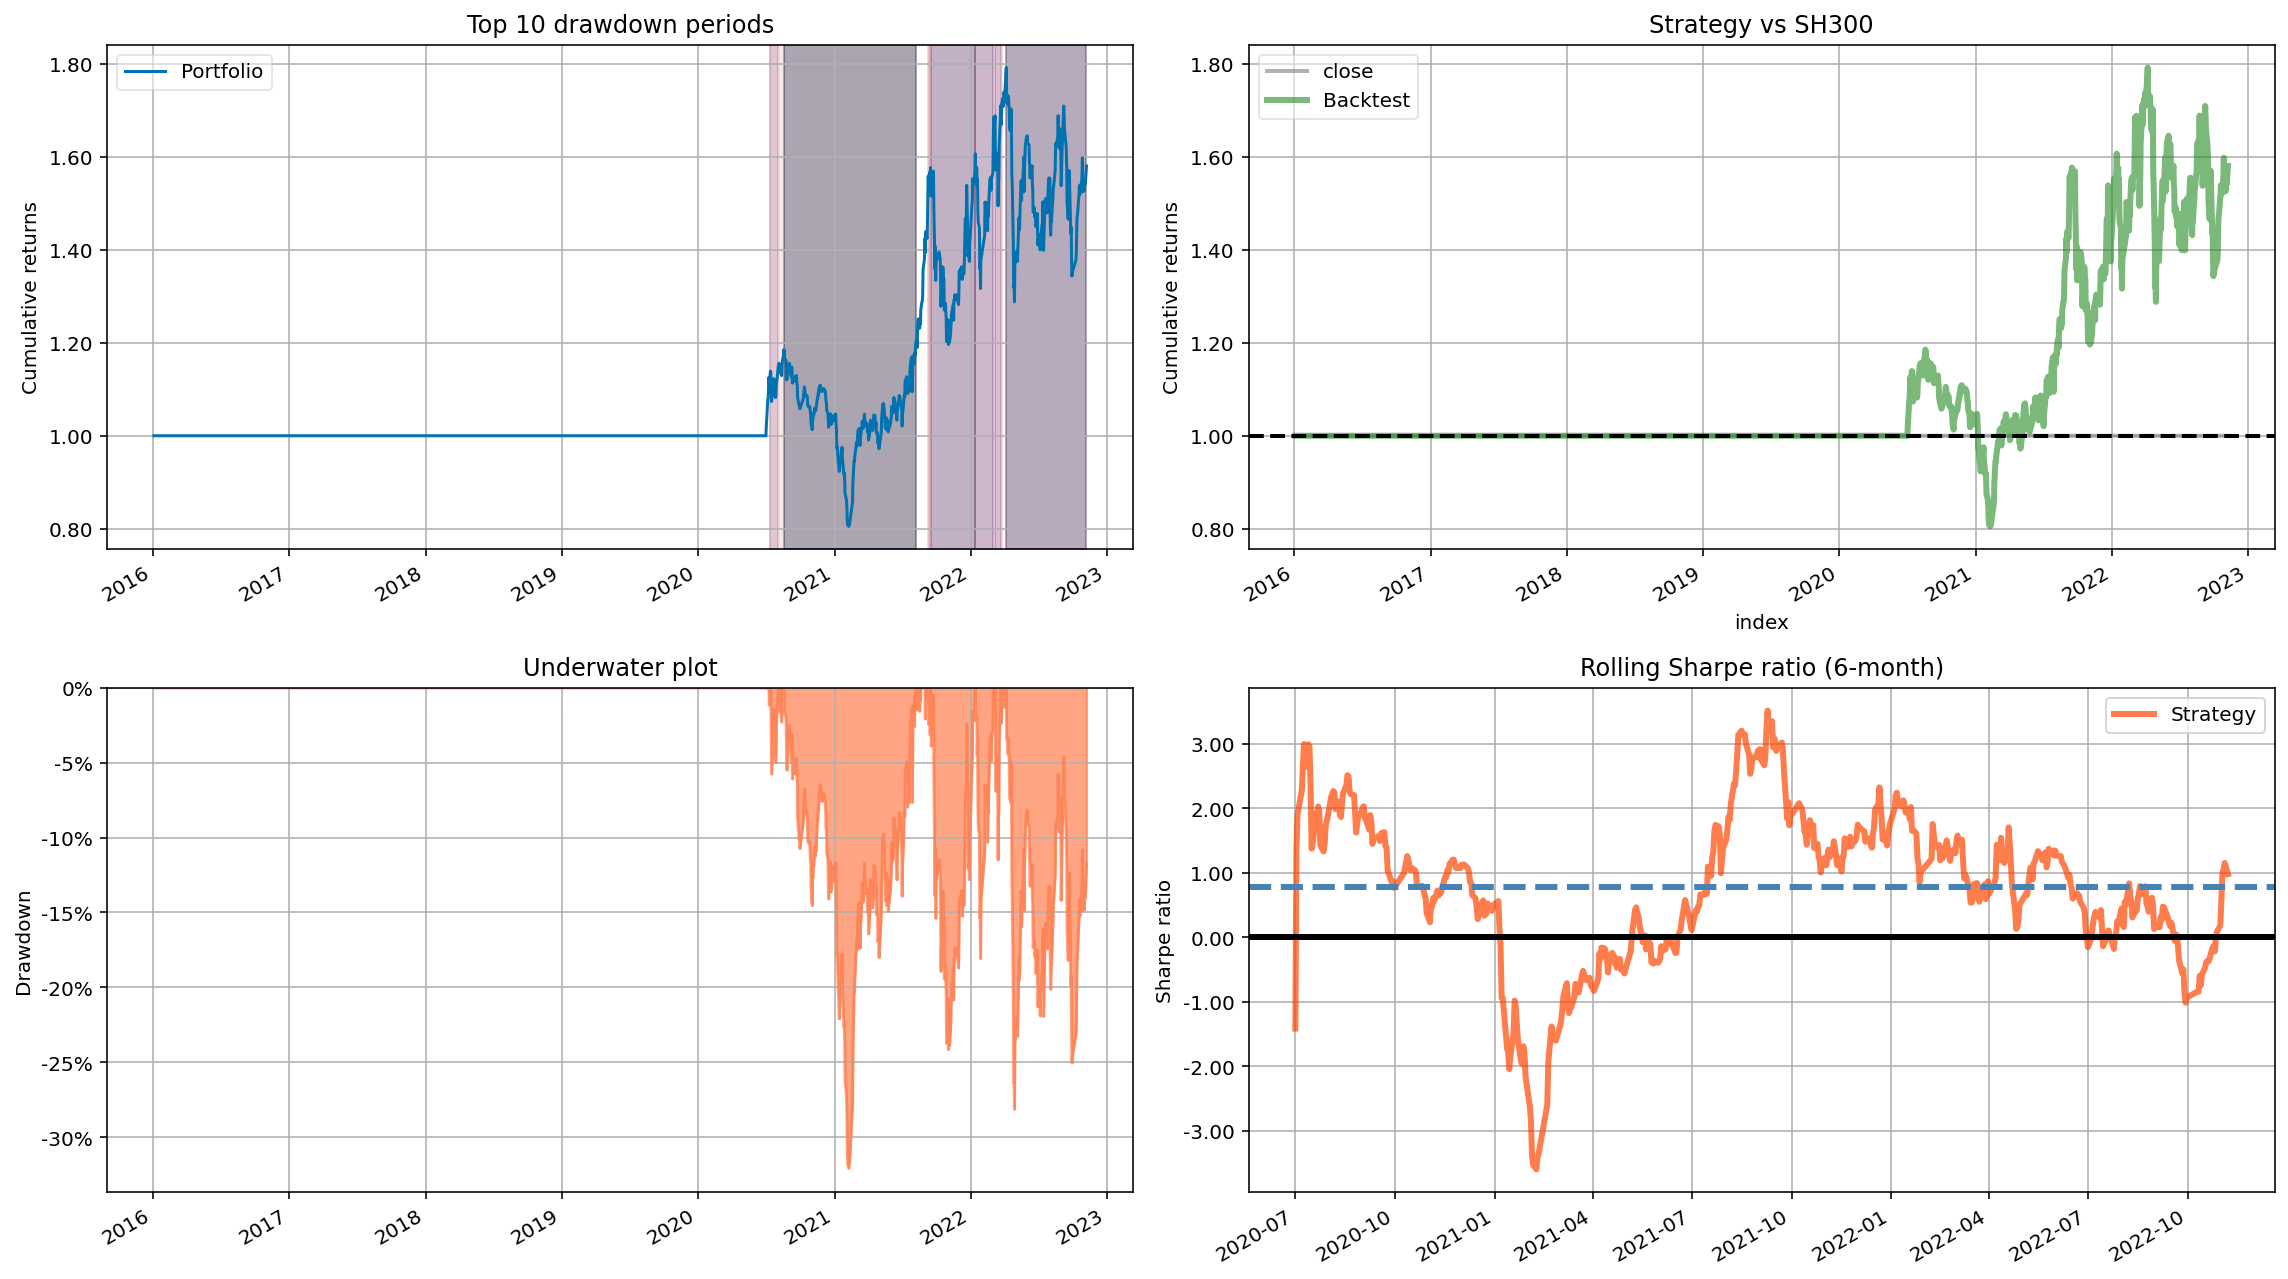

In [224]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs SH300')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('images/chart3', dpi=300)

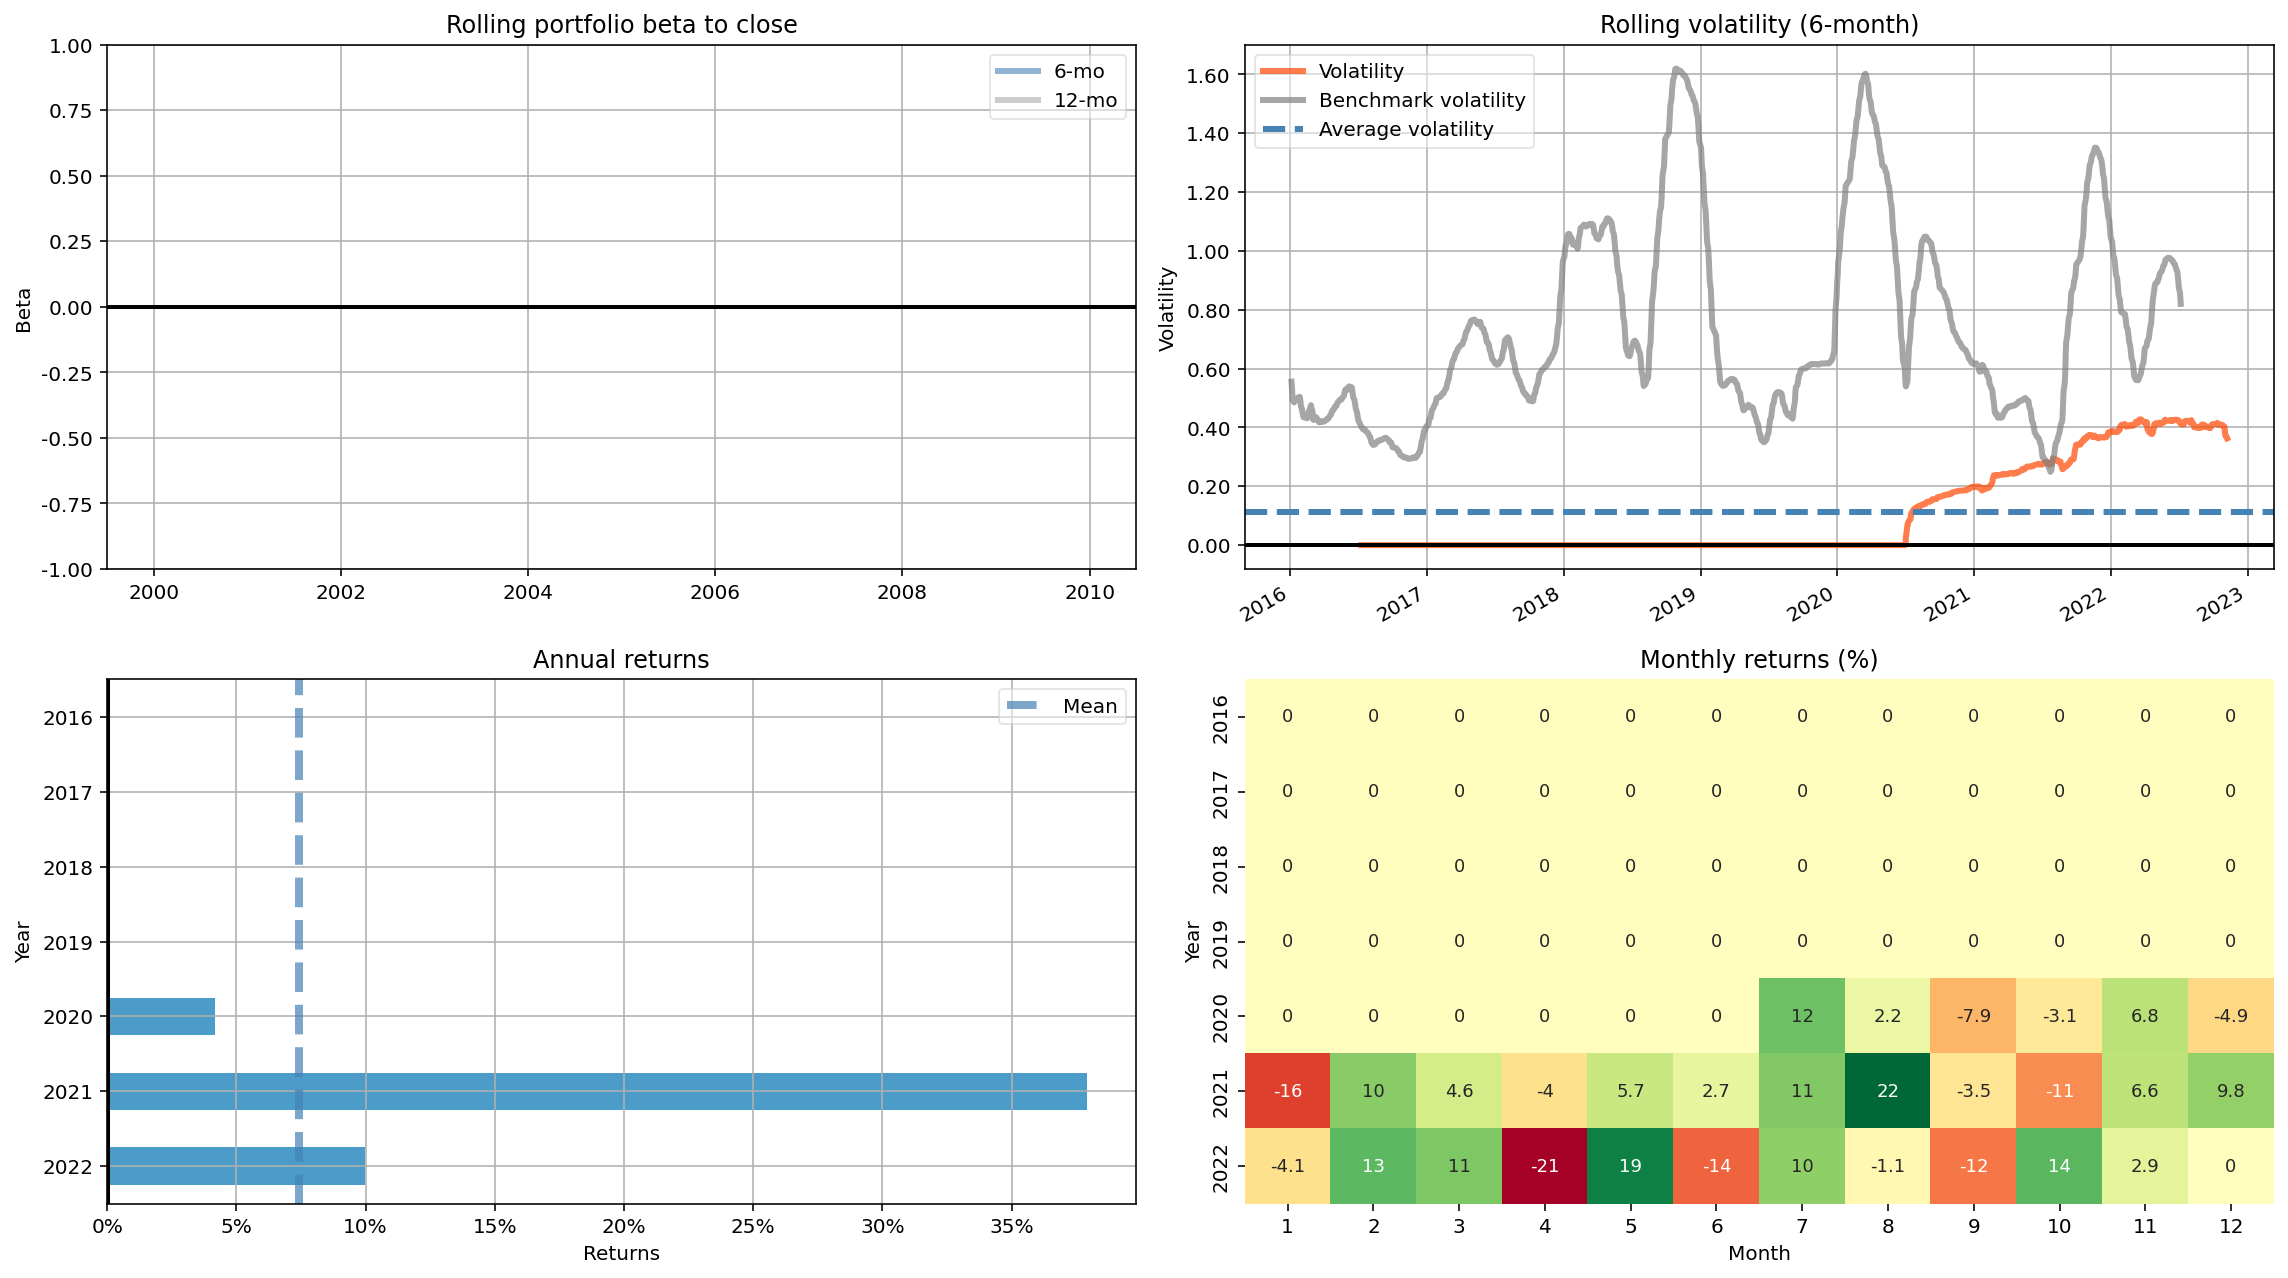

In [225]:
returns.index=returns.index.date
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[0])
axes[0].grid(True)

pf.plot_rolling_volatility(returns=returns, factor_returns=benchmark_rets,ax=axes[1])
axes[1].grid(True)

pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
# fig.suptitle('BL Portfolio vs BSE-SENSEX - 2', fontsize=16, y=1.0)


plt.tight_layout()
# plt.savefig('images/chart4', dpi=300)

### 策略2回测

In [226]:
# 初始化
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
# 添加策略
cerebro.addstrategy(PercentStrategy)
# 添加多股数据
test_group = back_data.groupby('Stkcd')
for stockid in stock_codes:#从股票池取出一只标的
    if stockid in [601991,600008,600000,600006,601999,601989]:
        continue
    stock = test_group.get_group(stockid).copy()# 获取数据
    stock.rename(columns = {'Opnprc':'open','Hiprc':'high','Loprc':'low','Clsprc':'close','Dnshrtrd':'volume','Strategy2':'strategy'}, inplace=True)
    data = SignalData(dataname=stock)# 加载数据 
    ########################################################### 交易日期
#     data = bt.feeds.PandasData(dataname=stock)# 加载数据
    cerebro.adddata(data, name = stockid)# 在Cerebro中添加股票数据

# 初始资金
cerebro.broker.setcash(100000.0)
# 交易费率
cerebro.broker.setcommission(commission=0.003)
# 初始化分析员
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [227]:
# 回测
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-07-06, OPERATION RESULT --- Gross: 0.05, Net: -0.01
2020-07-06, OPERATION RESULT --- Gross: -0.02, Net: -0.04
2020-07-06, OPERATION RESULT --- Gross: -0.46, Net: -0.51
2020-07-06, OPERATION RESULT --- Gross: -0.05, Net: -0.09
2020-07-07, OPERATION RESULT --- Gross: -0.08, Net: -0.10
2020-07-07, OPERATION RESULT --- Gross: -0.07, Net: -0.09
2020-07-07, OPERATION RESULT --- Gross: -0.03, Net: -0.10
2020-07-07, OPERATION RESULT --- Gross: -0.39, Net: -0.42
2020-07-08, OPERATION RESULT --- Gross: -0.48, Net: -0.53
2020-07-09, OPERATION RESULT --- Gross: 0.19, Net: 0.19
2020-07-10, OPERATION RESULT --- Gross: -0.20, Net: -0.24
2020-07-10, OPERATION RESULT --- Gross: 1.04, Net: 0.96
2020-07-10, OPERATION RESULT --- Gross: 1.19, Net: 1.08
2020-07-13, OPERATION RESULT --- Gross: 0.30, Net: 0.24
2020-07-13, OPERATION RESULT --- Gross: 1.04, Net: 0.91
2020-07-13, OPERATION RESULT --- Gross: -0.45, Net: -0.48
2020-07-13, OPERATION RESULT --- Gross: -0.25, 

In [228]:
# 分析
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2016-01-04 00:00:00+00:00    0.0
2016-01-05 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [229]:
# strategy评价
import pyfolio as pf
pf.show_perf_stats(returns)

Start date,2016-01-04
End date,2022-11-07
Total months,79
,Backtest
Annual return,4.114%
Cumulative returns,30.503%
Annual volatility,17.054%
Sharpe ratio,0.32
Calmar ratio,0.14
Stability,0.43
Max drawdown,-30.054%


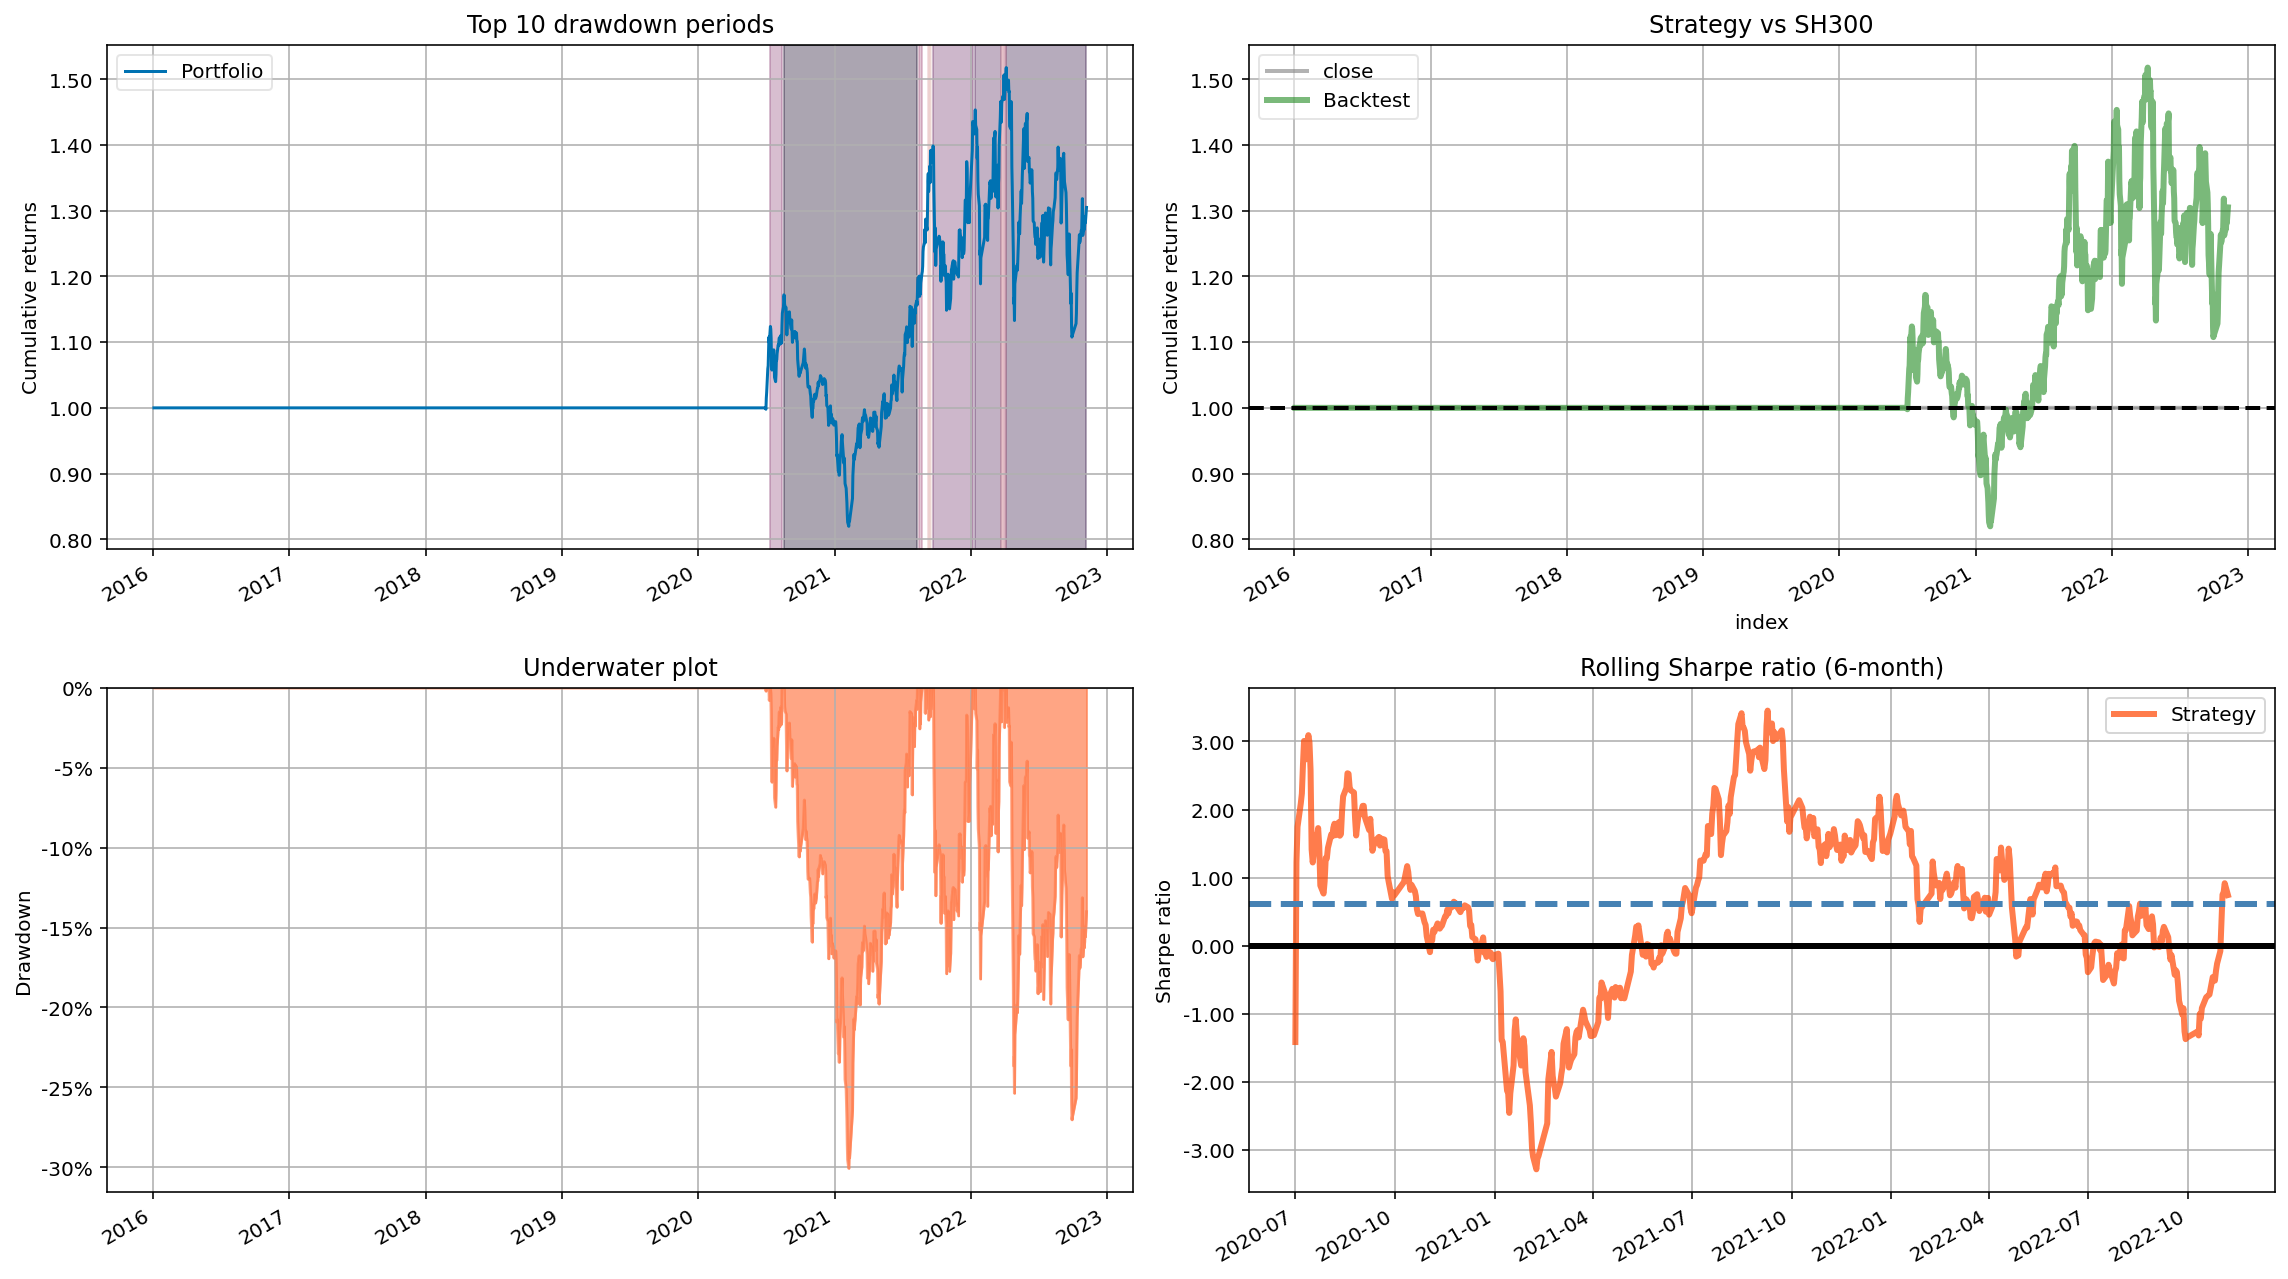

In [230]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs SH300')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('images/chart3', dpi=300)

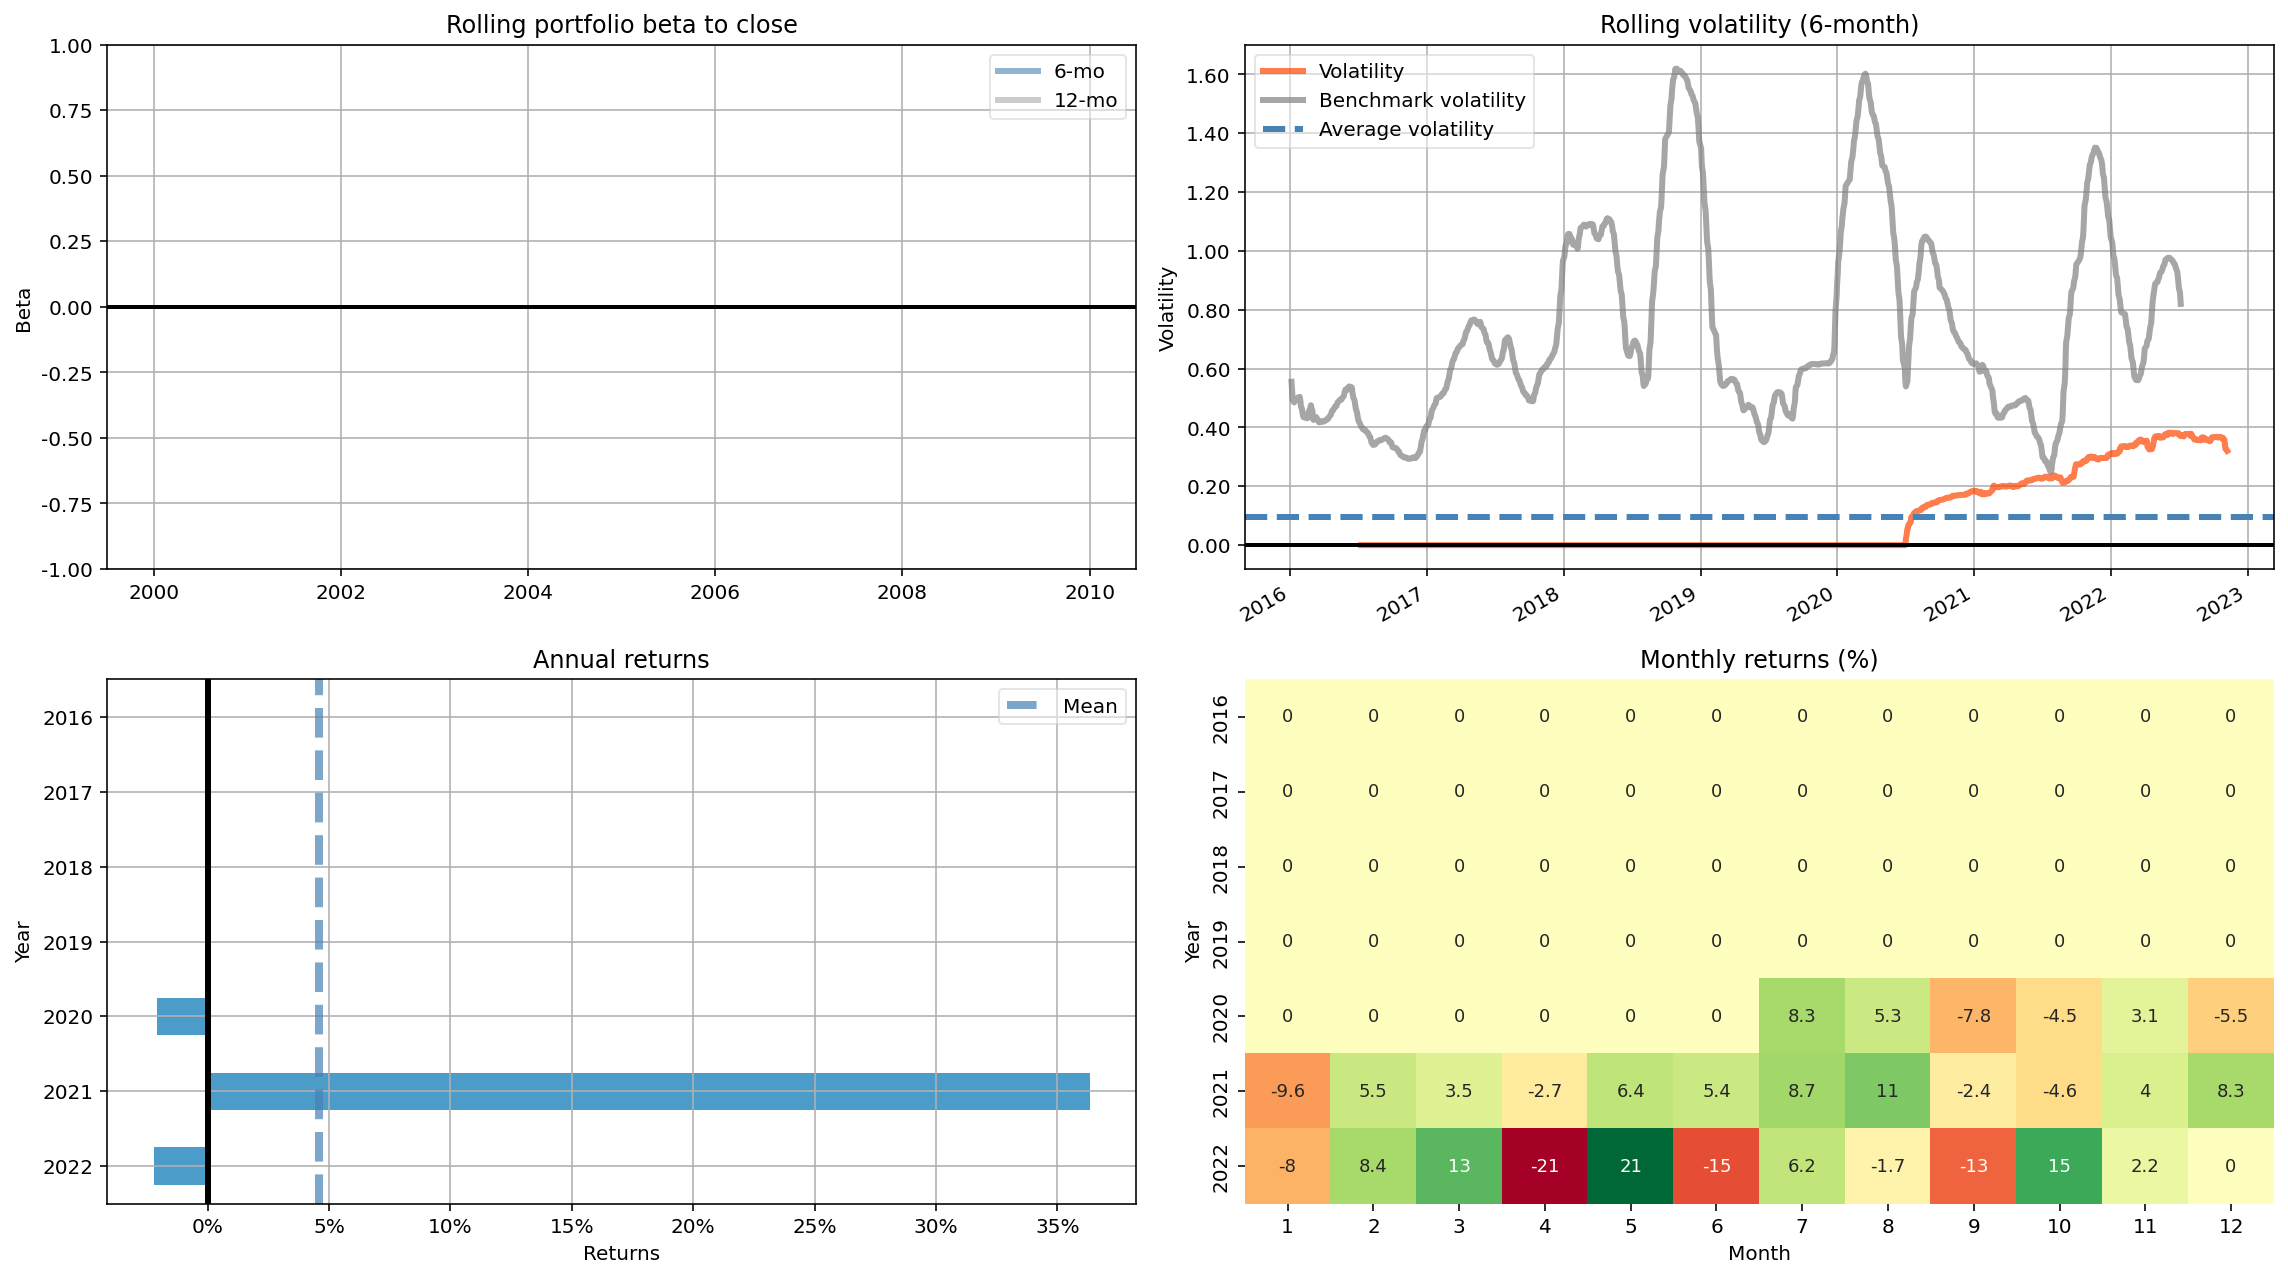

In [231]:
returns.index=returns.index.date
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[0])
axes[0].grid(True)

pf.plot_rolling_volatility(returns=returns, factor_returns=benchmark_rets,ax=axes[1])
axes[1].grid(True)

pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
# fig.suptitle('BL Portfolio vs BSE-SENSEX - 2', fontsize=16, y=1.0)


plt.tight_layout()
# plt.savefig('images/chart4', dpi=300)

### 策略3回测

In [232]:
# 初始化
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
# 添加策略
cerebro.addstrategy(TopkStrategy,n_stock=1)
# 添加多股数据
test_group = back_data.groupby('Stkcd')
for stockid in stock_codes:#从股票池取出一只标的
    if stockid in [601991,600008,600000,600006,601999,601989]:
        continue
    stock = test_group.get_group(stockid).copy()# 获取数据
    stock.rename(columns = {'Opnprc':'open','Hiprc':'high','Loprc':'low','Clsprc':'close','Dnshrtrd':'volume','Strategy3':'strategy'}, inplace=True)
    data = SignalData(dataname=stock)# 加载数据 
    ########################################################### 交易日期
#     data = bt.feeds.PandasData(dataname=stock)# 加载数据
    cerebro.adddata(data, name = stockid)# 在Cerebro中添加股票数据

# 初始资金
cerebro.broker.setcash(100000.0)
# 交易费率
cerebro.broker.setcommission(commission=0.003)
# 初始化分析员
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [233]:
# 回测
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-07-01, Order Failed
2020-12-17, Order Failed
2020-12-17, Order Failed
2020-12-17, Order Failed
2020-12-18, Order Failed
2020-12-25, Order Failed
2020-12-25, Order Failed
2021-01-08, Order Failed
2021-01-11, Order Failed
2021-01-11, Order Failed
2021-01-13, Order Failed
2021-01-13, Order Failed
2021-01-13, OPERATION RESULT --- Gross: 2.13, Net: 2.08
2021-01-18, OPERATION RESULT --- Gross: -0.06, Net: -0.07
2021-01-25, Order Failed
2021-01-27, OPERATION RESULT --- Gross: -0.11, Net: -0.12
2021-01-28, OPERATION RESULT --- Gross: -0.04, Net: -0.05
2021-01-29, Order Failed
2021-02-08, Order Failed
2021-02-08, Order Failed
2021-02-22, OPERATION RESULT --- Gross: 0.11, Net: 0.10
2021-02-23, Order Failed
2021-02-24, Order Failed
2021-02-25, Order Failed
2021-02-26, Order Failed
2021-02-26, OPERATION RESULT --- Gross: 1.52, Net: 1.51
2021-03-03, OPERATION RESULT --- Gross: 0.02, Net: 0.01
2021-03-05, Order Failed
2021-03-11, Order Failed
2021-04-14, Orde

In [234]:
# 分析
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2016-01-04 00:00:00+00:00    0.0
2016-01-05 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [235]:
# strategy评价
import pyfolio as pf
pf.show_perf_stats(returns)

Start date,2016-01-04
End date,2022-11-07
Total months,79
,Backtest
Annual return,0.41%
Cumulative returns,2.742%
Annual volatility,0.993%
Sharpe ratio,0.42
Calmar ratio,4.68
Stability,0.68
Max drawdown,-0.088%


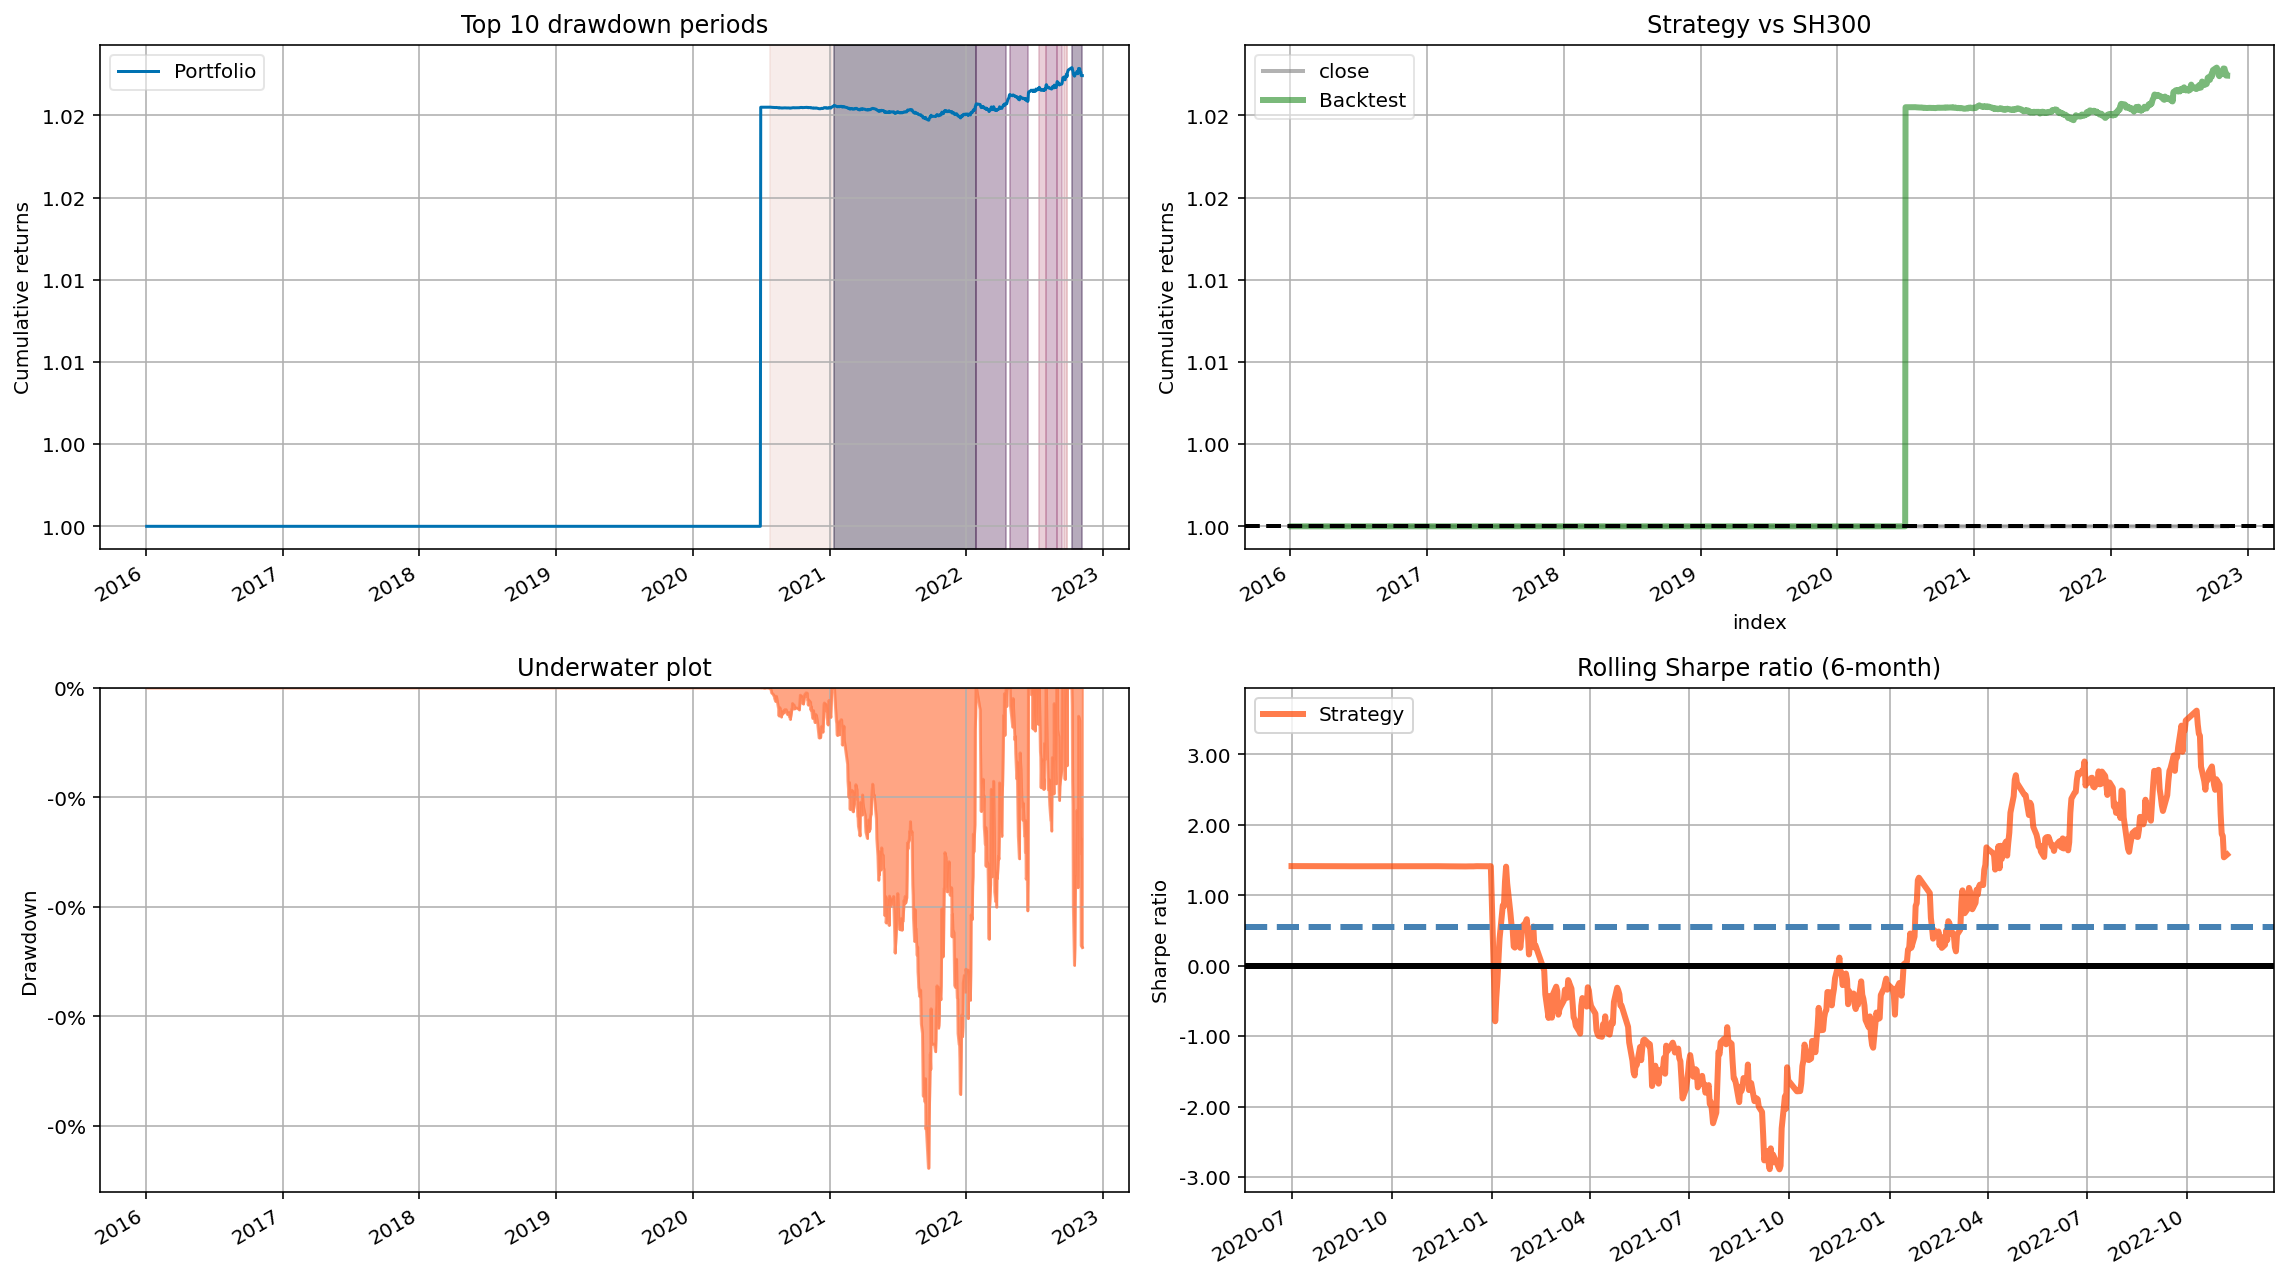

In [236]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs SH300')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('images/chart3', dpi=300)

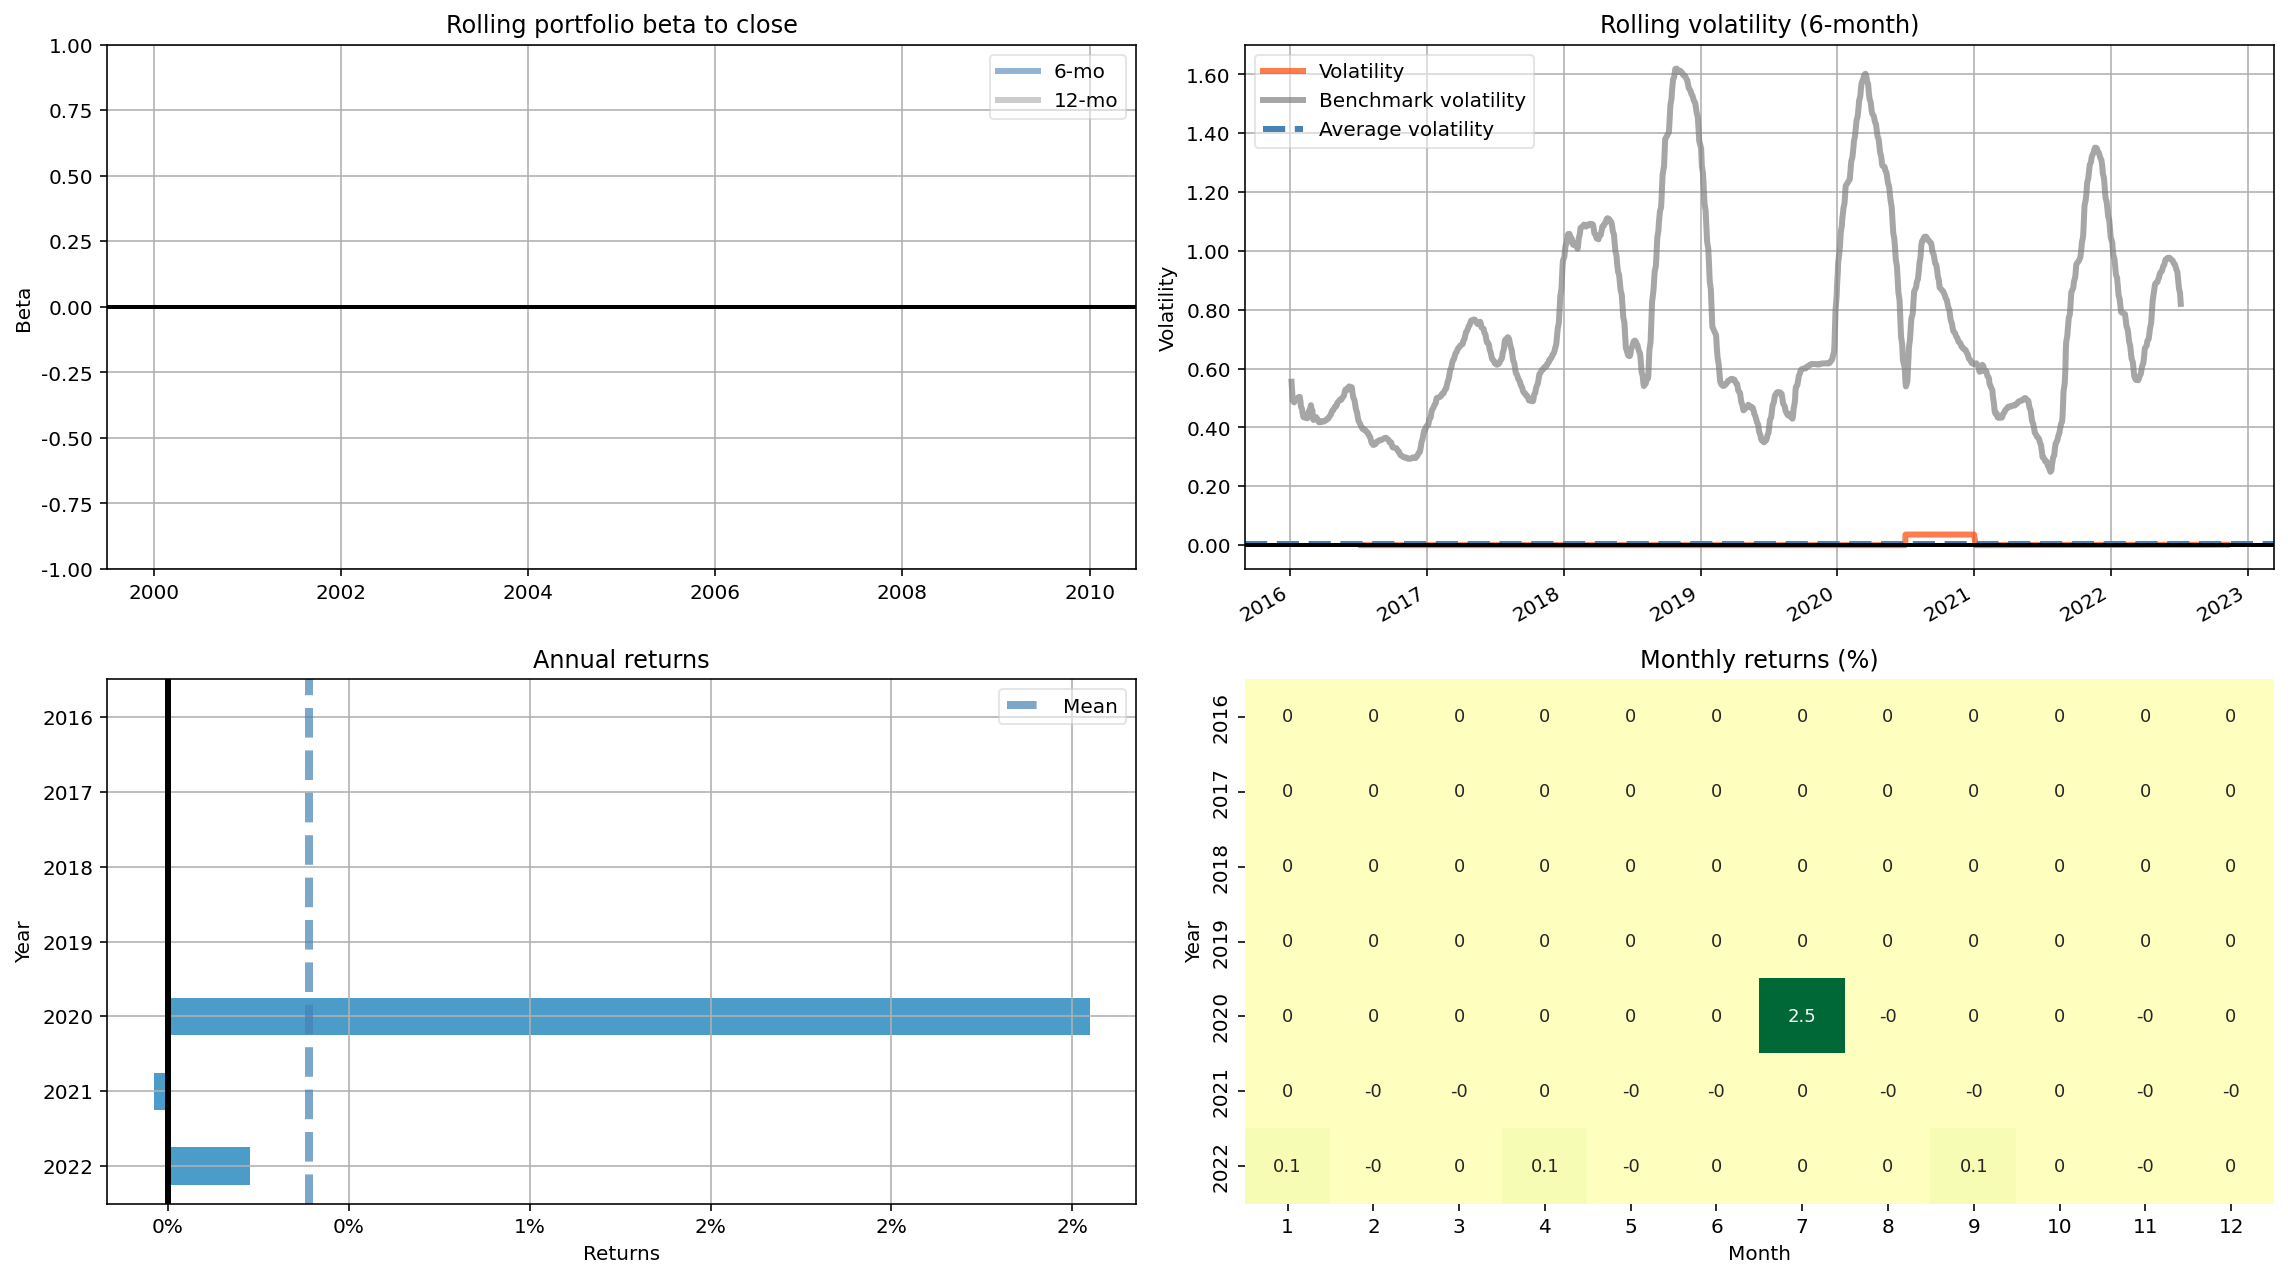

In [237]:
returns.index=returns.index.date
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[0])
axes[0].grid(True)

pf.plot_rolling_volatility(returns=returns, factor_returns=benchmark_rets,ax=axes[1])
axes[1].grid(True)

pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
# fig.suptitle('BL Portfolio vs BSE-SENSEX - 2', fontsize=16, y=1.0)


plt.tight_layout()
# plt.savefig('images/chart4', dpi=300)

### 策略4回测

In [238]:
# 初始化
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
# 添加策略
cerebro.addstrategy(TopkStrategy,n_stock=5)
# 添加多股数据
test_group = back_data.groupby('Stkcd')
for stockid in stock_codes:#从股票池取出一只标的
    if stockid in [601991,600008,600000,600006,601999,601989]:
        continue
    stock = test_group.get_group(stockid).copy()# 获取数据
    stock.rename(columns = {'Opnprc':'open','Hiprc':'high','Loprc':'low','Clsprc':'close','Dnshrtrd':'volume','Strategy4':'strategy'}, inplace=True)
    data = SignalData(dataname=stock)# 加载数据 
    ########################################################### 交易日期
#     data = bt.feeds.PandasData(dataname=stock)# 加载数据
    cerebro.adddata(data, name = stockid)# 在Cerebro中添加股票数据

# 初始资金
cerebro.broker.setcash(100000.0)
# 交易费率
cerebro.broker.setcommission(commission=0)#0.003)
# 初始化分析员
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [239]:
# 回测
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-07-03, OPERATION RESULT --- Gross: 0.01, Net: 0.01
2020-07-07, OPERATION RESULT --- Gross: -0.05, Net: -0.05
2020-07-08, OPERATION RESULT --- Gross: 0.18, Net: 0.18
2020-07-10, OPERATION RESULT --- Gross: -0.07, Net: -0.07
2020-07-16, OPERATION RESULT --- Gross: 0.47, Net: 0.47
2020-07-23, OPERATION RESULT --- Gross: -0.17, Net: -0.17
2020-07-24, OPERATION RESULT --- Gross: 0.65, Net: 0.65
2020-08-05, OPERATION RESULT --- Gross: 0.03, Net: 0.03
2020-08-06, OPERATION RESULT --- Gross: -0.37, Net: -0.37
2020-08-10, OPERATION RESULT --- Gross: 0.32, Net: 0.32
2020-08-20, OPERATION RESULT --- Gross: -0.17, Net: -0.17
2020-09-01, OPERATION RESULT --- Gross: 0.02, Net: 0.02
2020-11-06, OPERATION RESULT --- Gross: 0.12, Net: 0.12
2020-11-11, OPERATION RESULT --- Gross: 0.29, Net: 0.29
2020-11-19, OPERATION RESULT --- Gross: -0.21, Net: -0.21
2020-12-11, OPERATION RESULT --- Gross: 0.01, Net: 0.01
2020-12-16, OPERATION RESULT --- Gross: 0.05, Net: 0.05


In [240]:
# 分析
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2016-01-04 00:00:00+00:00    0.0
2016-01-05 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [241]:
# performance statistics for strategy
import pyfolio as pf
pf.show_perf_stats(returns)

Start date,2016-01-04
End date,2022-11-07
Total months,79
,Backtest
Annual return,-10.4%
Cumulative returns,-51.574%
Annual volatility,12.056%
Sharpe ratio,-0.85
Calmar ratio,-0.19
Stability,0.69
Max drawdown,-55.895%


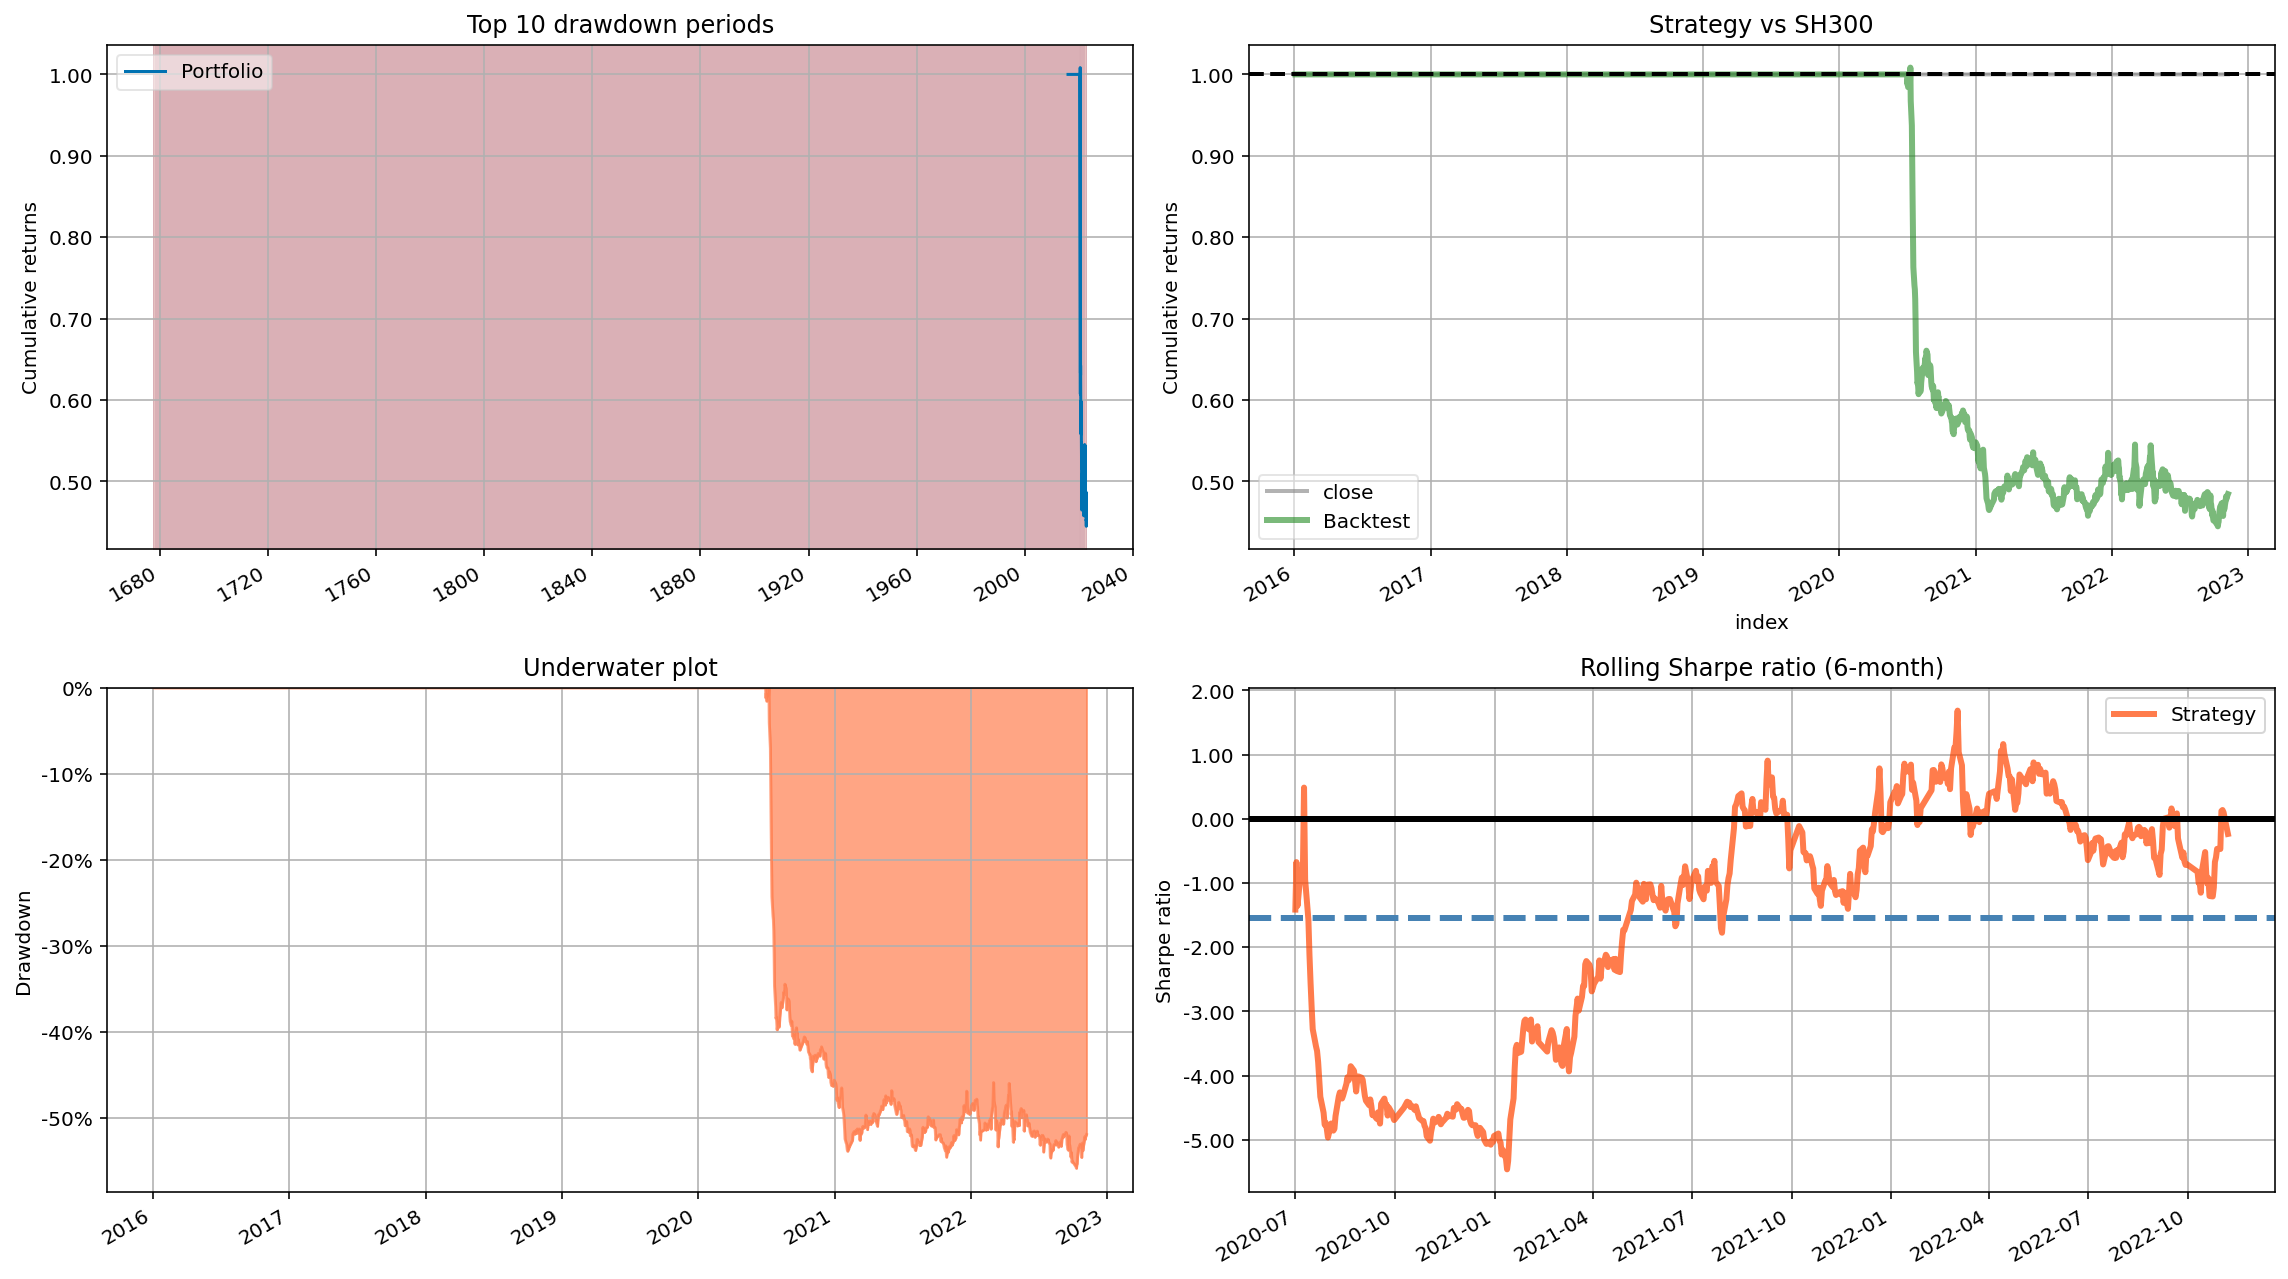

In [242]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs SH300')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('images/chart3', dpi=300)

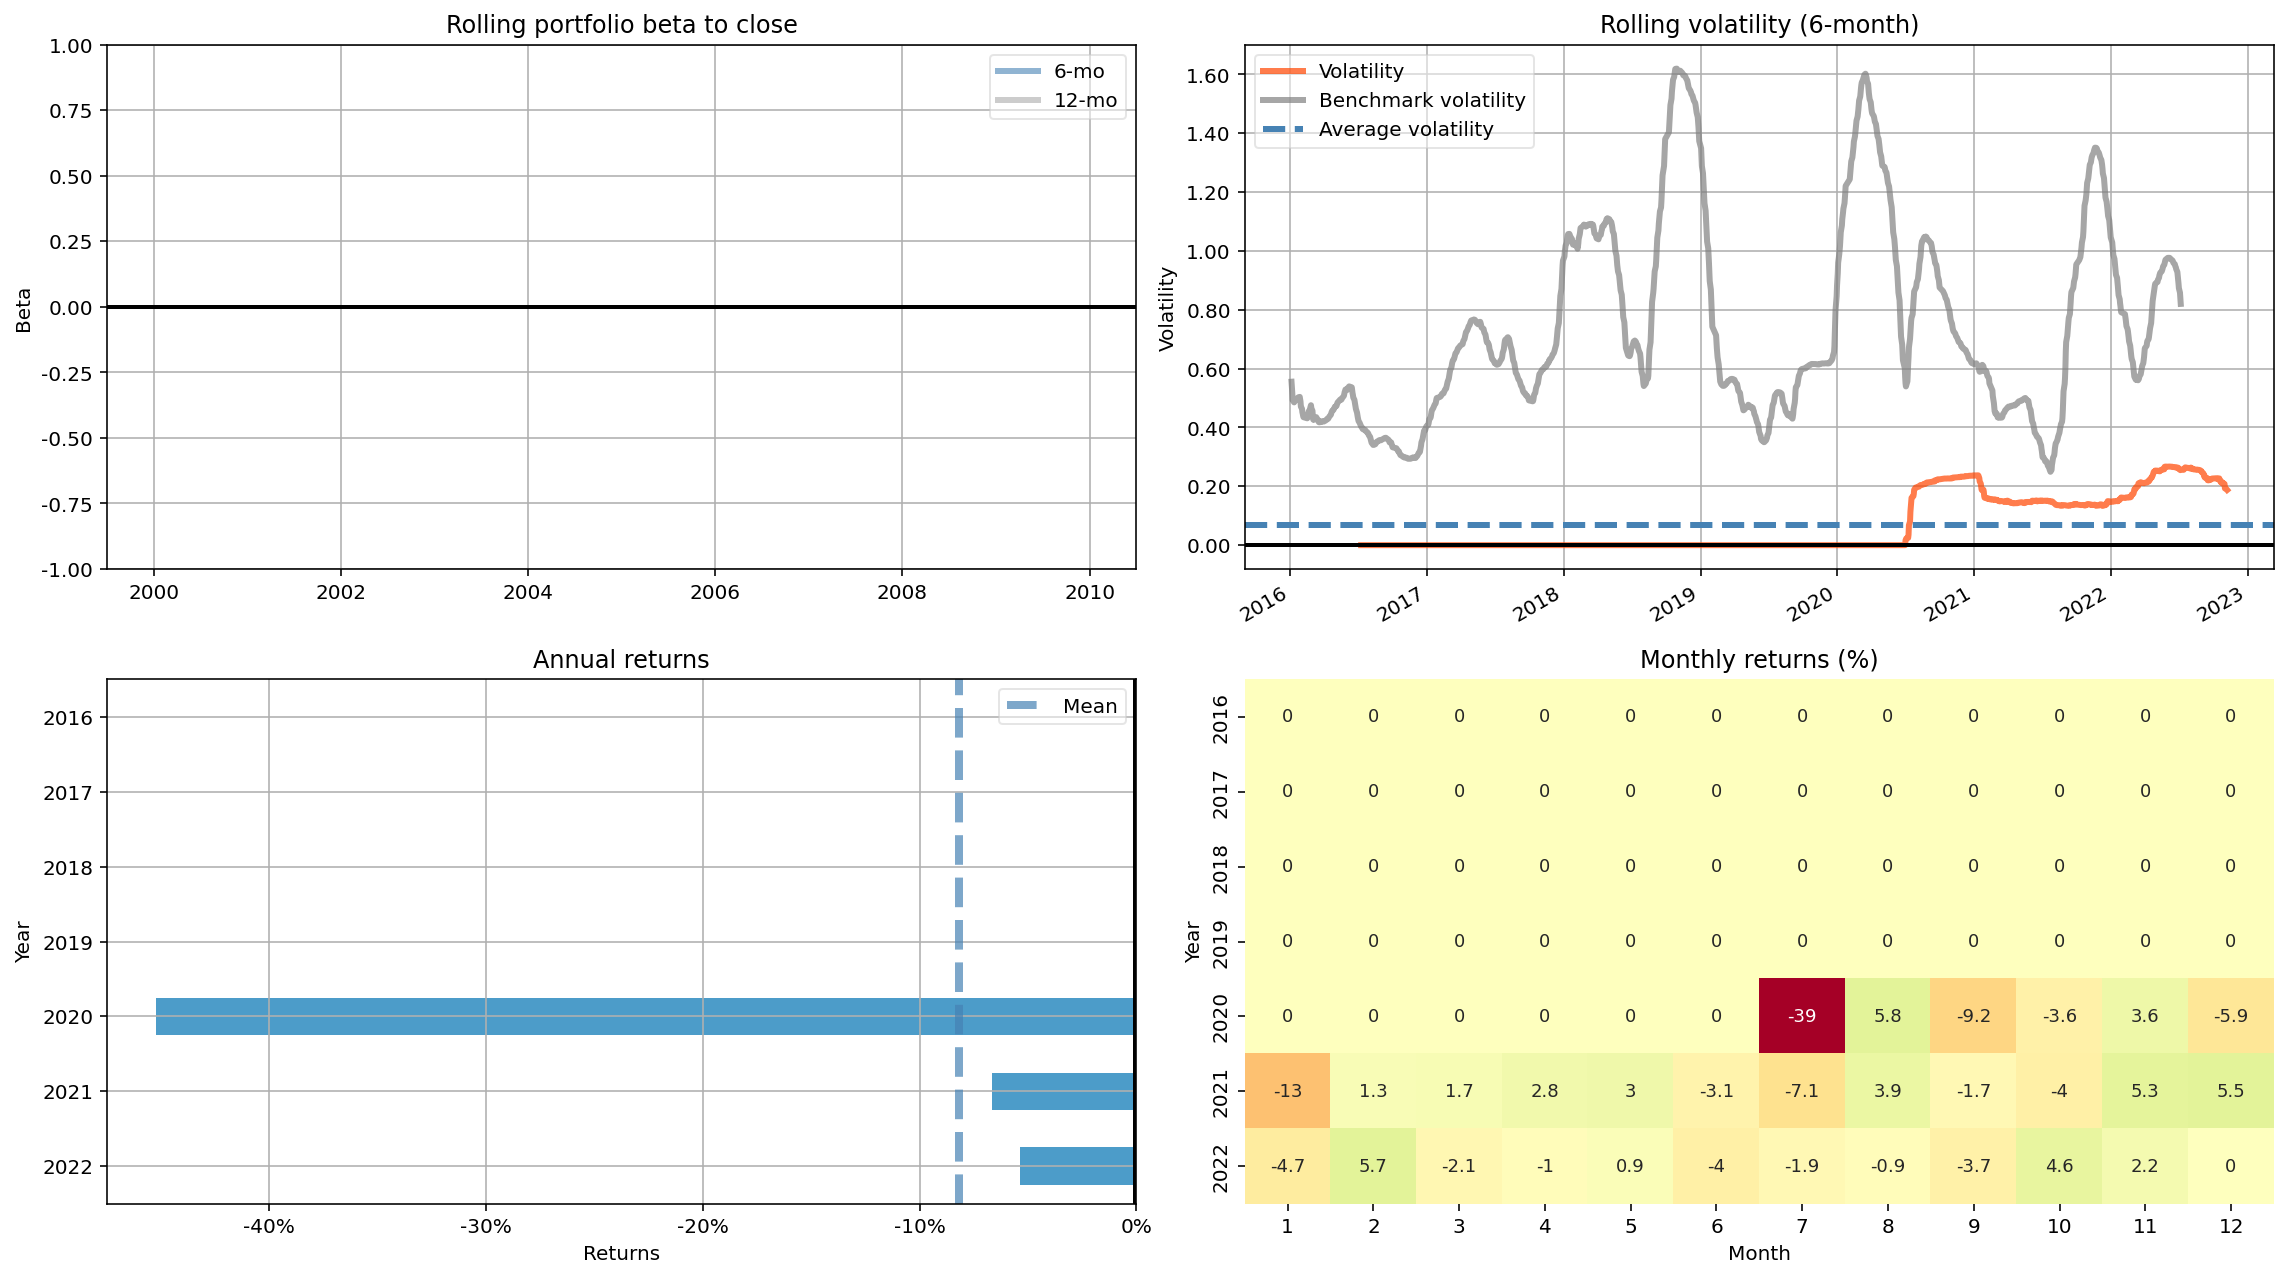

In [243]:
returns.index=returns.index.date
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[0])
axes[0].grid(True)

pf.plot_rolling_volatility(returns=returns, factor_returns=benchmark_rets,ax=axes[1])
axes[1].grid(True)

pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
# fig.suptitle('BL Portfolio vs BSE-SENSEX - 2', fontsize=16, y=1.0)


plt.tight_layout()
# plt.savefig('images/chart4', dpi=300)

### 策略5回测

In [246]:
# 初始化
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
# 添加策略
cerebro.addstrategy(TopkStrategy,n_stock=10)
# 添加多股数据
test_group = back_data.groupby('Stkcd')
for stockid in stock_codes:#从股票池取出一只标的
    if stockid in [601991,600008,600000,600006,601999,601989]:
        continue
    stock = test_group.get_group(stockid).copy()# 获取数据
    stock.rename(columns = {'Opnprc':'open','Hiprc':'high','Loprc':'low','Clsprc':'close','Dnshrtrd':'volume','Strategy5':'strategy'}, inplace=True)
    data = SignalData(dataname=stock)# 加载数据 
    ########################################################### 交易日期
#     data = bt.feeds.PandasData(dataname=stock)# 加载数据
    cerebro.adddata(data, name = stockid)# 在Cerebro中添加股票数据

# 初始资金
cerebro.broker.setcash(100000.0)
# 交易费率
cerebro.broker.setcommission(commission=0)#0.003)
# 初始化分析员
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [247]:
# 回测
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-07-03, OPERATION RESULT --- Gross: 0.01, Net: 0.01
2020-07-07, OPERATION RESULT --- Gross: 0.68, Net: 0.68
2020-07-08, OPERATION RESULT --- Gross: 0.27, Net: 0.27
2020-07-17, OPERATION RESULT --- Gross: 0.05, Net: 0.05
2020-07-22, OPERATION RESULT --- Gross: 0.00, Net: 0.00
2020-07-28, OPERATION RESULT --- Gross: 0.08, Net: 0.08
2020-07-29, OPERATION RESULT --- Gross: 1.22, Net: 1.22
2020-07-31, OPERATION RESULT --- Gross: 2.52, Net: 2.52
2020-08-04, OPERATION RESULT --- Gross: -0.35, Net: -0.35
2020-08-05, OPERATION RESULT --- Gross: 0.11, Net: 0.11
2020-08-10, OPERATION RESULT --- Gross: -0.17, Net: -0.17
2020-08-27, OPERATION RESULT --- Gross: -0.62, Net: -0.62
2020-08-31, OPERATION RESULT --- Gross: 0.97, Net: 0.97
2020-08-31, OPERATION RESULT --- Gross: -0.14, Net: -0.14
2020-09-07, OPERATION RESULT --- Gross: 0.05, Net: 0.05
2020-09-10, OPERATION RESULT --- Gross: 0.78, Net: 0.78
2020-09-10, OPERATION RESULT --- Gross: -0.35, Net: -0.35
20

In [248]:
# 分析
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2016-01-04 00:00:00+00:00    0.0
2016-01-05 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [249]:
# performance statistics for strategy
import pyfolio as pf
pf.show_perf_stats(returns)

Start date,2016-01-04
End date,2022-11-07
Total months,79
,Backtest
Annual return,-2.958%
Cumulative returns,-17.987%
Annual volatility,15.233%
Sharpe ratio,-0.12
Calmar ratio,-0.08
Stability,0.00
Max drawdown,-36.629%


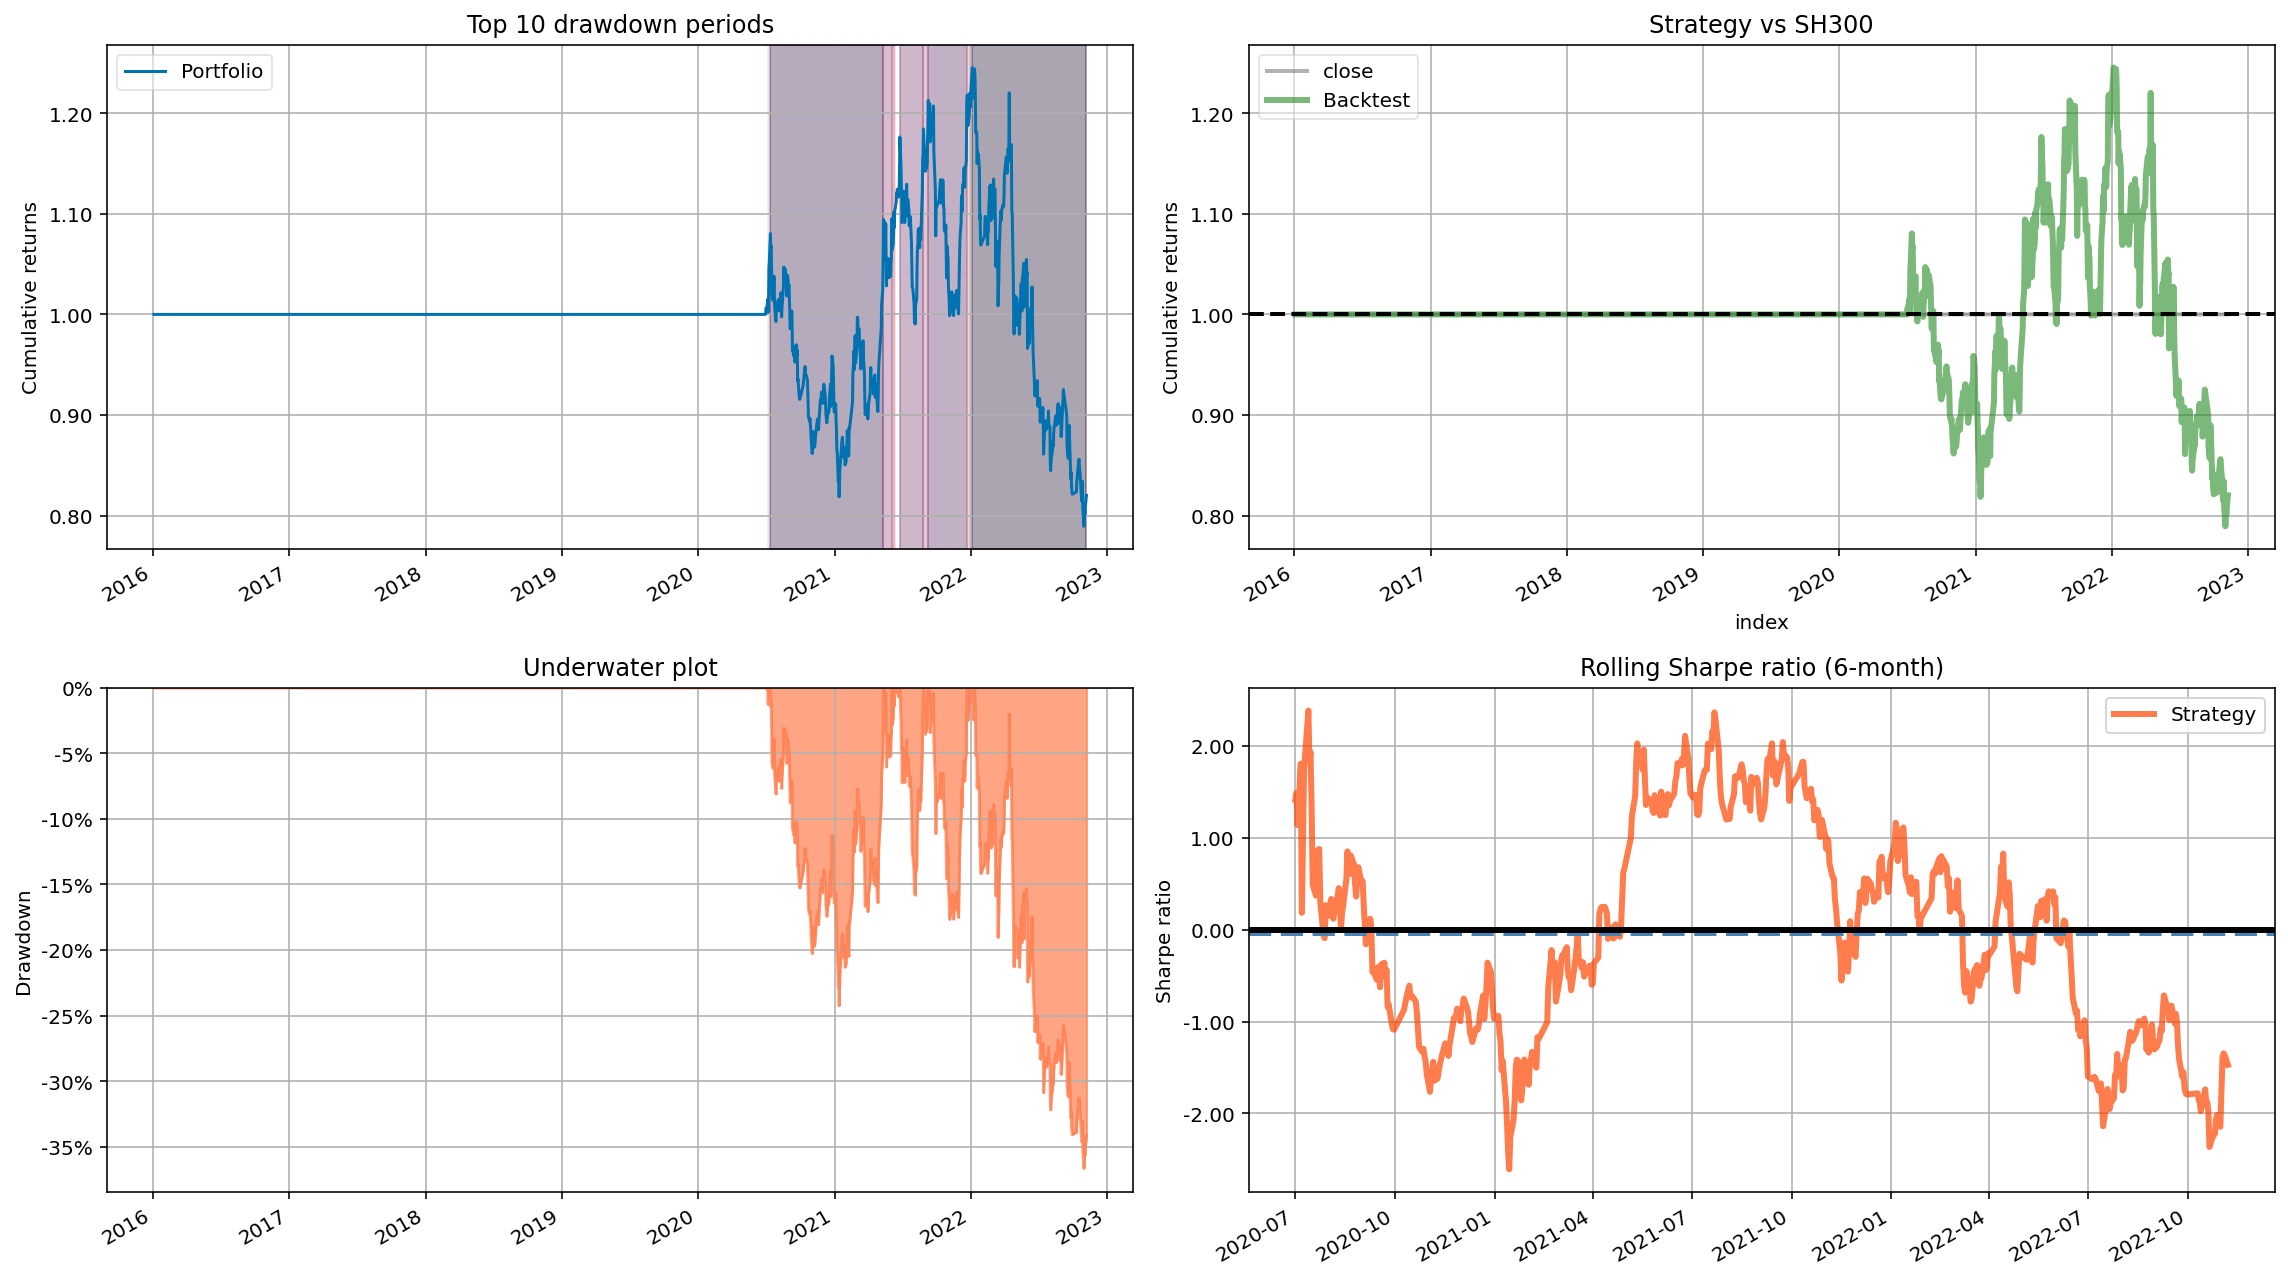

In [250]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs SH300')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('images/chart3', dpi=300)

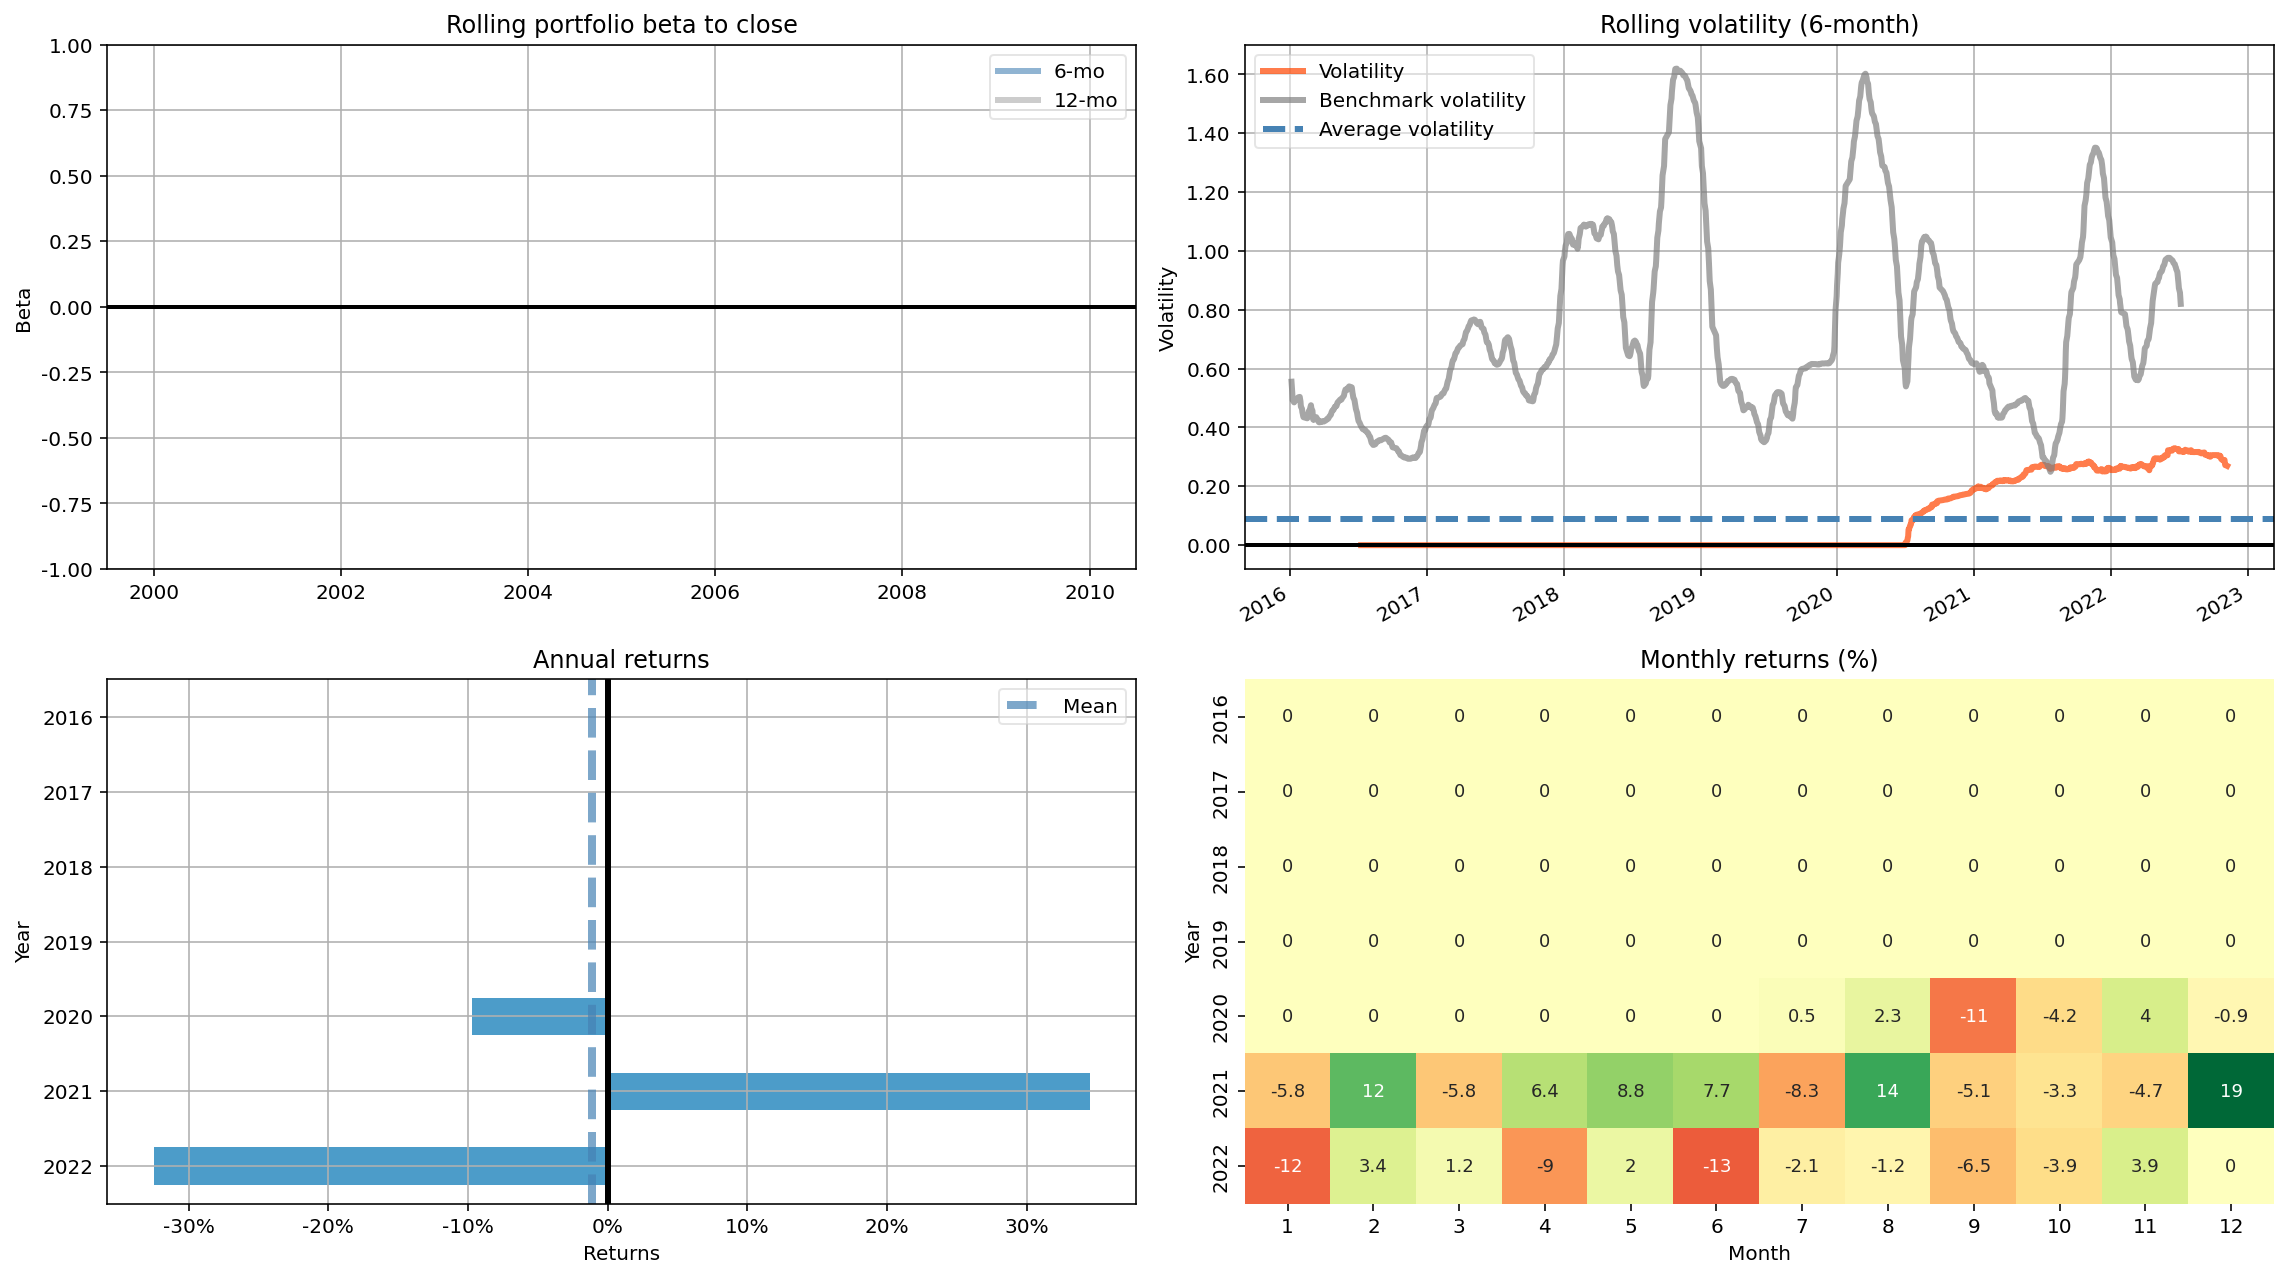

In [251]:
returns.index=returns.index.date
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[0])
axes[0].grid(True)

pf.plot_rolling_volatility(returns=returns, factor_returns=benchmark_rets,ax=axes[1])
axes[1].grid(True)

pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
# fig.suptitle('BL Portfolio vs BSE-SENSEX - 2', fontsize=16, y=1.0)


plt.tight_layout()
# plt.savefig('images/chart4', dpi=300)